<br>

# <center>Tabular Data Science Course, Bar-Ilan University</center>
## <center><b>TDS Project, Part 1 - Dataset Selection & EDA, Basic Model Analysis</b></center>

### Submitted to: <b>Dr. Amit Somech & Itay Elyashiv</b>

#### Submitted by: Yoav Yoscovich

# 1. Dataset Selection
As a dataset suited for a <b>regression</b> problem (rather than a classification problem), meeting the criteria specified in the assignment guidelines, I chose [<b>the largest diamond dataset currently available on Kaggle</b>](https://www.kaggle.com/datasets/hrokrin/the-largest-diamond-dataset-currely-on-kaggle/data). As will be detailed below, this dataset meets the criteria defined in the assignment guidlines. In particular:

- **Number of Records (rows)**: 219,703
- **Number of Attributes (features)**: 25
- **Attribute names and types**:
This dataset includes **7 numeric features** and **18 categorial features**, detailed below:
    - **Numeric Features**: carat_weight, depth_percent, table_percent, meas_length, meas_width, meas_depth and <b><i>total_sales_price</i> (the diamond price, which I selected as the target feature)</b>.
    - **Categorical Features**: cut, color, clarity, cut_quality, lab, symmetry, polish, eye_clean, culet_size, culet_condition, girdle_min, girdle_max, fluor_color, fluor_intensity, fancy_color_dominant_color, fancy_color_secondary_color, fancy_color_overtone, fancy_color_intensity.


## Dataset Loading and preview:
I will use the libraries we have used in [<b>the introduction example demonstrated in class:</b>](https://github.com/amitsomech/TDS-COURSE/tree/master/1.%20Introduction)
Namely, the main libraries I will use are:
### (I) Data Processing Libraries:
- **Pandas**: Used for data processing & manipulation. In particular, providing the DataFrame data structure.
- **Numpy**: Python library for working with arrays, providing support for a wide range of mathematical functions.
- **Scipy**: Library used for scientific computing in Python. In particular, offering the 'stats' submodule, offering tools for statistical computations.
- **Statsmodels**: Statistical modeling and hypothesis testing Python library. In particular, offering the 'statsmodels.api' module, useful for linear regression.
- **Itertools**: a library which is a part of Python's standard library, especially useful for creating combinations (I use this library to generate all possible combinations of features, used later on in the assignment).
### (II) Data Vizualization Libraries:
- **Seaborn**: Data visualization library built on top of the <i>Matplotlib</i> library.
- **Matplotlib** (and especially the module <i>matplotlib.pyplot</i>): A library enabling creating various visualizations in python; in particular, the module <i>matplotlib.pyplot</i>, offered by Matplotlib, enables easily creating plots (e.g. <i>'plot()'</i>, <i>'scatter()'</i>, <i>'bar()'</i>).

### (III) Machine Learning Libraries:
- **XGBoost**: a machine learning, gradient boosting library; It builds an ensemble of decision trees sequentially (as we briefly learned in ML course last year), where each tree corrects the errors of the previous ones.
- **Scikit-learn**: a machine learning and model development library in Python. Among other useful features, it offers evaluation metrics (e.g. $R^2$, MSE, MAE, MAPE), also enabling conveniently splitting datasets into training and testing subsets for model evaluation and validation.

### (IV) Model Explainability:
- **Shap**: a library for interpretable ML, which helps to understand the output of ML models by computing the contribution of each feature.


<br><br>

Note: according to the assignment guidelines, we should include a requirements.txt file <i>"if you use non trivial packages (not introduced in class)"</i>.
<br><u>I haven't used any non-trivial packages</u>; however, to be on the safe side, I also included a requirements.txt file.
<br>
To install the required dependencies, run:
```
pip install -r requirements.txt

Importing all the libraries used in this notebook:

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

%matplotlib inline

# Machine learning library
# Importing xgboost and the evaluation metrics:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

# I use the 'itertools' library to generate all possible combinations of features, used later on in the assignment.
from itertools import combinations

# Importing the train_test_split function from the sklearn.model_selection module, to split the data into training and testing sets.
from sklearn.model_selection import train_test_split

# SHAP library enables us to understand the importance of each feature in the model, widely used in section 4 of the assignment.
import shap

# Importing the stats module from the scipy library, I will use it for linear regression line & for calculating Spearman's rank correlation coefficient.
from scipy import stats
import statsmodels.api as sm


### Loading the CSV dataset:
> Note: the .csv file on Kaggle includes a serial Id column, but it doesn't add any real information about the diamonds, so we don't use it as a 'real' feature. The title of that field ('Id') is missing but, we can refer to the Id's as the first column (of index 0).

In [2]:
dtf = pd.read_csv("./data/diamonds.csv",index_col=0)

In [3]:
# Now I create a dtf, consisting of the detailed columns:
cols = ["cut","color","clarity", "carat_weight", "cut_quality", "lab", "symmetry", "polish", "eye_clean", "culet_size", "culet_condition", "depth_percent", "table_percent", "meas_length", "meas_width", "meas_depth",
        "girdle_min", "girdle_max", "fluor_color", "fluor_intensity", "fancy_color_dominant_color", "fancy_color_secondary_color", "fancy_color_overtone", "fancy_color_intensity", "total_sales_price"]
dtf = dtf[cols]

### Now, I will show that the dataset meets the criteria detailed in the assignment guidelines, namely:
- We will see that this dataset includes **219,703 records**, which is much more than the required 1K rows (219 times more than the required number of rows).
- We will see that this dataset includes **25 different attributes** (excluding the 'Id' column of course), which is more than the required 10 different attributes.

In [4]:
# Printing the number of rows in the dataset:
print("Number of rows in the dataset: ", len(dtf))

# Printing the number of attributes in the dataset:
print("Number of attributes in the dataset: ", len(dtf.columns))

Number of rows in the dataset:  219703
Number of attributes in the dataset:  25


### Reference
Before moving on to the EDA, I'll provide again a reference to the dataset which I selected:
> **Reference**: [<b>the largest diamond dataset currently available on Kaggle</b>](https://www.kaggle.com/datasets/hrokrin/the-largest-diamond-dataset-currely-on-kaggle/data).

---

### <b>2. Exploratory Data Analysis (EDA)</b>
##### As we have learned in class, the goal of this phase is to understand the different features and relations between them and w.r.t. the target feature.
Below I will detail the **top-5, most significant visualizations** which I chose, and for each, I will explain:
- Why did I choose this visualization.
- Why is this visualization significant for the task at hand.

### <b><u>Visualization #1</u>: Distribution of the total_sales_price feature (the target feature):</b>
### Why did I choose this visualization?
The total_sales_price is the <b>target feature</b>. It is a numerical variable (diamond price).
KDE (Kernel Density Estimate) plot visulizes the probability density function of variable, showing the shape of the distribution and the density of the data.
KDE provides a continuous, smooth curve (for example compared to an histogram, consisting of separate bins).



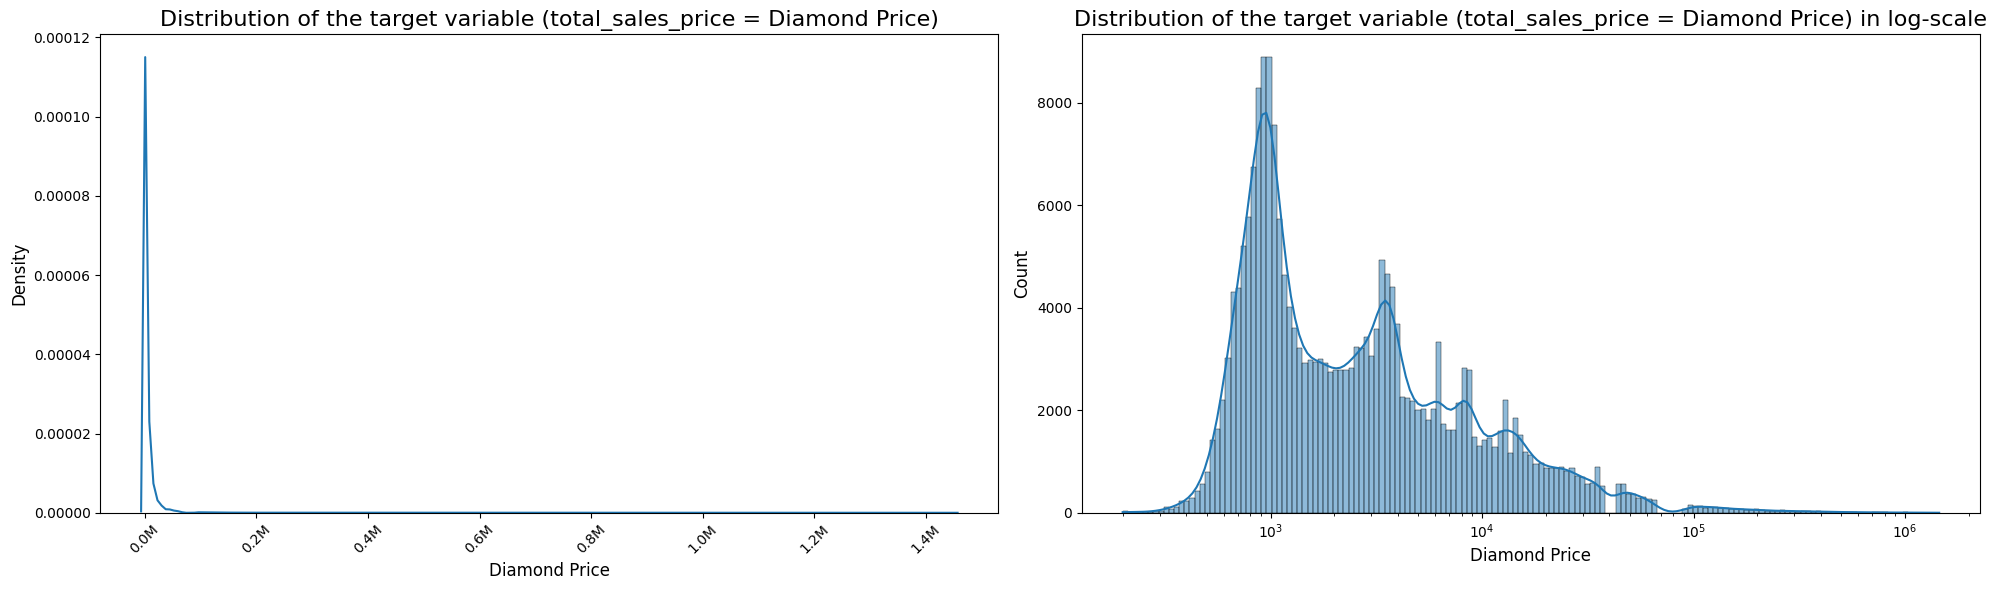

In [5]:
plt.figure(figsize=(20, 6))

# First subplot - KDE plot
plt.subplot(1, 2, 1)
sns.kdeplot(dtf.total_sales_price)
plt.ylabel('Density', fontsize=12)
plt.xlabel('Diamond Price', fontsize=12)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))
ticks = np.arange(0, dtf.total_sales_price.max(), step=0.2e6)
plt.xticks(ticks, [f'{tick / 1e6:.1f}M' for tick in ticks], rotation=45)
plt.title('Distribution of the target variable (total_sales_price = Diamond Price)', fontsize=16)

# Second subplot - Histogram with log scale
plt.subplot(1, 2, 2)
sns.histplot(dtf.total_sales_price, kde=True, log_scale=True)
plt.title('Distribution of the target variable (total_sales_price = Diamond Price) in log-scale', fontsize=16)
plt.xlabel('Diamond Price', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

#### In this case, the KDE plot on the left shows that the target variable (total_sales_price) is <b>heavily right-skewed</b>, which means that there are more low-priced diamonds than high-priced diamonds in the dataset. <i>We can also see that the differences in prices of various diamonds in the dataset are significant</i>. This information will be useful when building a machine learning model to predict the price of diamonds.


#### <b>However, since the target variable is highly right-skewed, we cannot see the real behaviour of diamond price using only the left graph; the right graph presents the diamond price with log-transformation to the x-axis (diamond price), so it is visually dispersed.</b>


### Why is this visualization significant for the task at hand?
<b>Even before log-transforming the price, we could see that the prices are highly right-skewed.
<br>
The log transformed price distribution has provided us further information and understanding of the distribution of the target variable, showing us that most prices are still mostly around \$100-\$10,000 and extending up to \$100,000 with a negligible tail beyond that price. 
<br>
There are some distinct peaks at \$1000 and around \$3500 which are probably related to popular products based on certain social preferences (as we know in real-life, also in Israel, there are 'popular' prices, determined by supply and demand considerations).
<br>
This might impact the model's ability to predict price values, given that while most of the diamonds cost around \$100-\$10,000, there are diamonds which cost more than \$100,000.
<br><br>
This observation might become useful when we will be asked to improve the model, as it will be very interesting to calculate the log(price) values and test whether this transform improves the models ability to predict the diamond price, compared to giving the original prices, before applying log function.
</b>
<br>

---

### <b><u>Visualization #2</u>: Examining Correlations of numeric features to the target feature - involving 2 or 3 columns, and non-linear correlation:</b>
### Why did I choose this visualization?
As we have learned in class, it is crucial to understand the correlation between the various features in our dataset and the target feature. This enables us to identify the importance of each feature with regards to prediction of the target variable.
<br>
As we will find out below, some features that we might assume that are crucial for pricing a diamond, based on common sense, are not as important as we might think. On the other hand, some features we might think of as marginal features, are more important than we might assume.
<br>

### Why is this visualization significant for the task at hand?
<b>Understanding which feature are more/less correlated with the target feature may help us improve the performance of our model, by selecting the most important features (and disregarding the ones that are less important).</b>
<br><br>
<i>In particular, it would be very interesting (and I will present this analysis in the next parts of this assignment) to find out whether the model we will train will give greater importance to features we find here that are more strongly correlated with the target feature (the diamond price). </i>
<br>
Understanding the correlation between the features and the target variable is important, not only for building a better and more accurate model, but also to get an interpretable model.
<br> Moreover, as we have learned in class, <i>features that are highly correlated with one another are sometimes redundant</i>; therefore, I will check below for correlation between each two features in the dataset, to find whether this situation is present in our dataset.


In [7]:
# We also have categorial values (e.g. "cut", "color" & "clarity" attributes).
# Since corr() method (offered as part of "pandas" library) gets numeric data, as a solution, I will include ONLY categorial attributes. I will present visualizations for the categorial attributes later on.
dtf_numeric = dtf.select_dtypes(include=[float, int])
dtf_corr = dtf_numeric.corr(method="pearson").loc[["total_sales_price"]]


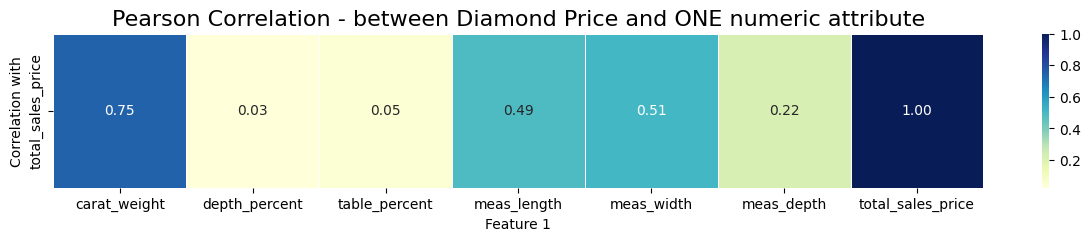

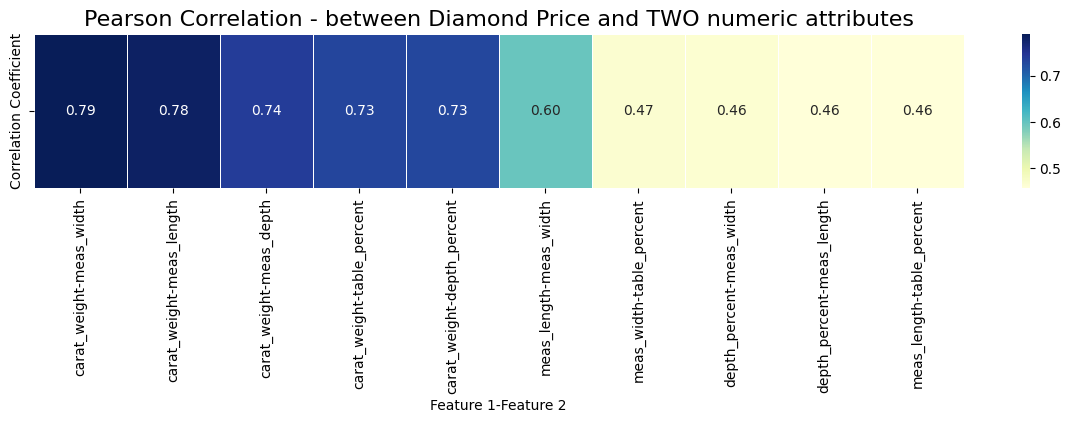

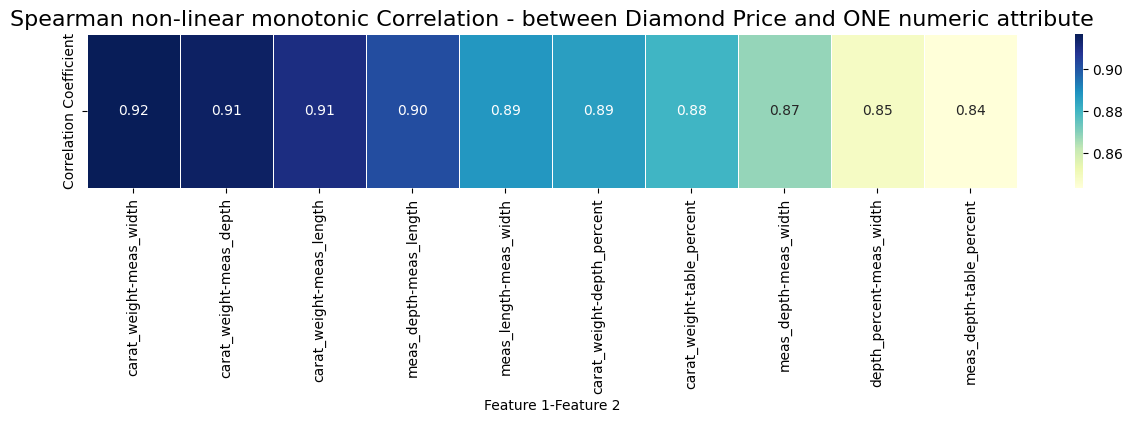

In [8]:
fig, ax = plt.subplots(figsize=(15,2))

# ALEF: Plotting the correlation matrix as a heatmap:
sns.heatmap(dtf_corr, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, ax=ax)
plt.title("Pearson Correlation - between Diamond Price and ONE numeric attribute", fontsize=16)
plt.ylabel("Correlation with")
plt.xlabel("Feature 1")
plt.show()


# BET: Create combinations of two features
features = dtf_numeric.columns.difference(['total_sales_price'])
# See how I use the 'combinations' function from the 'itertools' library I have imported in the beginning of the assignment:
feature_combinations = list(combinations(features, 2))

combined_corrs_list = []
for f1, f2 in feature_combinations:
    # Note that here I multiplied the values of the two features, since I wanted to see the 'mix' of both, how it correlates with the target variable:
    combined_feature = dtf_numeric[f1] * dtf_numeric[f2]
    corr_value = combined_feature.corr(dtf_numeric['total_sales_price'])
    combined_corrs_list.append({
        'Feature 1': f1,
        'Feature 2': f2,
        'Correlation Coefficient': corr_value
    })

combined_corrs = pd.DataFrame(combined_corrs_list)
combined_corrs.sort_values(by='Correlation Coefficient', ascending=False, inplace=True)

# I chose to show top-10 correlations (but can change afterwards if this is not enough, I can't show them all - there are many combinations...):
top_n = 10
fig, ax = plt.subplots(figsize=(15, 2))
sns.heatmap(
    combined_corrs.head(top_n).set_index(['Feature 1', 'Feature 2']).T,
    annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, linewidths=0.5, ax=ax
)

plt.title('Pearson Correlation - between Diamond Price and TWO numeric attributes', fontsize=16)
plt.show()



# GIMEL: Create combinations of two features
features = dtf_numeric.columns.difference(['total_sales_price'])
feature_combinations = list(combinations(features, 2))

combined_corrs_list = []
for f1, f2 in feature_combinations:
    combined_feature = dtf_numeric[f1] * dtf_numeric[f2]
    # Note the use of Spearman's rank correlation for non-linear monotonic relationships:
    corr_value = combined_feature.corr(dtf_numeric['total_sales_price'], method='spearman')
    combined_corrs_list.append({
        'Feature 1': f1,
        'Feature 2': f2,
        'Correlation Coefficient': corr_value
    })

combined_corrs = pd.DataFrame(combined_corrs_list)
combined_corrs.sort_values(by='Correlation Coefficient', ascending=False, inplace=True)

# I chose to show top-10 correlations (but can change afterwards if this is not enough, I can't show them all - there are many combinations...):
top_n = 10
fig, ax = plt.subplots(figsize=(15, 2))
sns.heatmap(
    combined_corrs.head(top_n).set_index(['Feature 1', 'Feature 2']).T,
    annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, linewidths=0.5, ax=ax
)

plt.title('Spearman non-linear monotonic Correlation - between Diamond Price and ONE numeric attribute', fontsize=16)
plt.show()


Explanations and conclusions which may be drawn from the 3 above graphs:
1. <b><u>Regarding the first graph</u>:</b> <b>this graph visualizes the pearson correlation coefficients between the target variable (diamond price) and ONE other numeric attribute.</b> We can observe that:
- 'carat_weight' is the feature which is highest correlated with the target feature (diamond price), having correlation coefficient of 0.75. This is consistent with prior knowledge and common sense regarding diamond prices, as it is known that the weight of a diamond is a significant factor in determining its price.
- 'meas_width' & 'meas_length' are also quite high correlated with the target feature (diamond price), having correlation coefficients of 0.51 and 0.49 respectively.
- 'table_percent' & 'depth_percent' are very low correlated with the target feature (diamond price), having correlation coefficients of 0.05 and 0.03 respectively.
<br><br>
2. <b><u>Regarding the second graph</u>:</b> as we have learned in class, sometimes we can find correlation of <u>TWO</u> features with the target variable; therefore, I wanted to explore which combinations of 2 features together correlate the most with the target variable (diamond price). <b>However, pearson correlation is calculated only on 2 values, so I multiplied the two features one by the other, and then calculated the correlation of the result with the target variable. This graph visualizes the pearson correlation coefficients between the target variable (diamond price) and TWO other numeric attribute. It presents the feature-pairs which are the most correlated with the target feature</b>. We can observe that:
- We have already seen using the first graph that the top-3 correlated features with the target feature are: 'carat_weight', 'meas_width' and 'meas_length'. We can see that the combination of 'carat_weight' with 'meas_width' has higher correlation with the target variable comparing to each feature separately (correlation coefficient of 0.79), which makes sense as each one of them seperately has high correlation with the target variable. Similarly, we can see that the combination of 'carat_weight' with 'meas_length' has higher correlation with the target variable comparing to each feature separately (correlation coefficient of 0.78).
- We can also see that combining the features 'meas_width' and 'meas_length' gets correlation coefficient of 0.6 with the target variable, which is quite much more than the correlation coefficient of each one of them seperately with the target feature (0.6 instead of only 0.51 and 0.49, respectively).
<br><br>
3. <b><u>Regarding the third graph</u>:</b> as we have learned in class, sometimes we can also find <i>non-linear</i> correlation between features. While pearson correlation is used to find linear correlation, spearman correlation is used to find non-linear correlation. Spearman correlation is a non-parametric measure of the strength and direction of the monotonic relationship between two variables. <b>While pearson correlation tries to find a linear relationship between two variables, spearman correlation measures how well the relationship between two variables can be described <i>by a monotonic function</i>. This graph visualizes the spearman correlation coefficients between the target variable (diamond price) and TWO other numeric attribute. It presents the feature-pairs which are the most correlated with the target feature</b>. We can observe that:
- The features 'carat_weight' and 'meas_width' were highly correlated even when we looked for linear relationship between them, having a correlation coefficient of 0.75. However, when looking for a non-linear relationship between them, using spearman, we find that the correlation coefficient for that feature-pair with the target feature <i>increases to 0.92</i>.
- It is interesting to observe that <b>although 'meas_depth' by itself was only moderately correlated with the target variable (having a pearson correlation coefficient of 0.22), when looking at the feature pair of 'carat_weight' and 'meas_depth', this pair is highly correlated with the target variable, having a correlation coefficient of 0.91</b>. Similarly, combining 'meas_depth' with the two other features which were highly correlated with the target variable ('meas_length' and 'meas_width') yields similar results.
- <b>The most interesting observation regarding the third graph is the correlation of the feature-pair of 'meas_depth' and 'table_percent' with the target feature; while 'meas_depth' by itself was only moderately correlated with the target variable (having a pearson correlation coefficient of 0.22), <u>and 'table_percent' was very <u>low</u> correlated with the target feature (having a pearson correlation coefficient of only 0.05)</u>, when looking at the feature pair of 'meas_depth' and 'table_percent', this pair is highly correlated with the target variable, having a correlation coefficient of 0.84.</b>
- <b>It is also suprising that "mixing" <u>the least correlated numeric feature</u> with the target feature ('depth_percent', having a correlation coefficient of only 0.03) with the most correlated numeric feature with the target feature ('carat_weight', having a correlation coefficient of only 0.75), <u>yields a better result than only 'carat_weight', yielding a correlated coefficient of 0.89</u>.</b>

---

### <b><u>Visualization #3</u>: Exploring the relationship between the 'clarity' attribute (a <i>categorial</i> feature) to the target feature (diamond's price):</b>
### Why did I choose this visualization?
While the correlation heatmap provided interesting and informative data regarding the relationship between the target variable and the numeric attributes, it did not provide any information about the relationship between the target variable and the <i>categorial</i> attributes.
<br>
As already noted, this dataset includes 18 categorial columns, out of the 25 columns in total (<i>more than 72% of the columns in this dataset are categorial</i>); therefore, in order to understand the nature of the data, it is crucial to also explore relationships of the target variable (diamond's price) with categorial columns - and this is why I chose this visualization.
<br><br>
Morever, it is commonly known that the clarity of a diamond is a very important factor in determining its price, so we would expect a strong correlation between the clarity level and the price of the diamond. <b>It is such a known factor that the <i>Gemological Institute of America (GIA)</i> has developed and introduced the diamond clarity grading system (the GIA Clarity Scale). It is the standard method used internationally to assess the clarity of diamonds, <u>ranging from Flawless (FL) to Included (I1, I2, I3)</u>.</b> Therefore, I wanted to explore whether this grading system may reflect price changes in various diamonds in the dataset, based on their clarity level.
<br>

### Why is this visualization significant for the task at hand?
<b>As already noted, understanding which feature are more/less correlated with the target feature may help us improve the performance of our model, by selecting and using the most important features. And, not less important, we might consider to deal with the less important features.</b> Since more than 72% of the columns in our dataset are categorial - understanding relationships involving <i>categorial</i> features is crucial for undersanding the nature of our data to further improve the pipeline in the next assignments.
<br>
In addition, as we will see below, at first glance it seems that the clarity level of diamonds has an <i>inverse</i> relationship with the diamonds' price. This observation is contradicting the market-guidlines in real-world for evaluating diamonds; therefore, as part of understanding the nature of the data in the dataset I chose (which is a goal in the EDA process), I was curious to find out whether this initial observation is misleading, and may be explained by other factors. Indeed, as will be explained below, when delving deeper into the possible reasons for this anomaly, we can find the explanation for this phenomenon, and after all we will see that the clarity level itself DOES increase the diamond price.
<br>

#### <b>In other words, as I will explain below, we will see that it will seem that as the clarity level improves, the diamond prices decrease for some reason; after exploring various possible reasons for that, I will explain below why although when looking at it straightforward it seems that way, but when considering other factors, actually the diamond price indeed increases as the clarity level increases, as we would expect in the first place!</b>

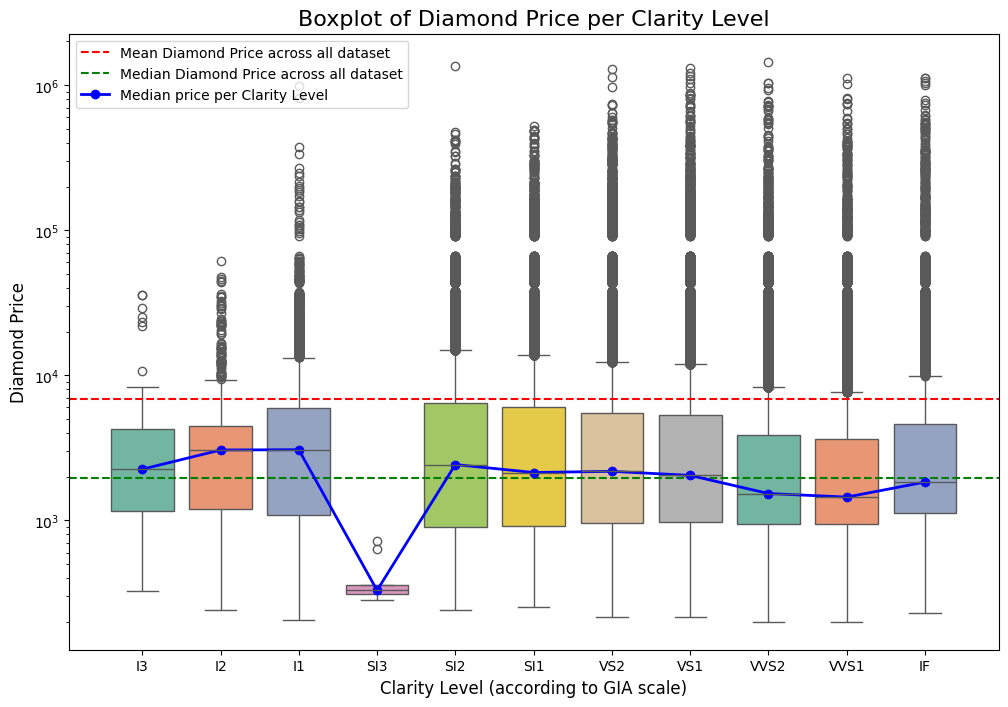

In [10]:
# Writing the order of diamond clarity from the worst to the best (according to the GIA scale, which I explained in the markup above):
clarity_order = ['I3', 'I2', 'I1', 'SI3', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

plt.figure(figsize=(12,8))

sns.boxplot(x="clarity", y="total_sales_price", data=dtf, order=clarity_order, palette="Set2")
plt.title("Boxplot of Diamond Price per Clarity Level", fontsize=16)
plt.xlabel('Clarity Level (according to GIA scale)', fontsize=12)
plt.ylabel('Diamond Price', fontsize=12)

# Line for mean diamond price of ALL diamonds in the dataset (I will make it red so we can see it):
plt.axhline(y=dtf.total_sales_price.mean(), color='r', linestyle='--', label='Mean Diamond Price across all dataset')

# Line for median diamond price of ALL diamonds in the dataset (I will make it green so we can see it):
plt.axhline(y=dtf.total_sales_price.median(), color='g', linestyle='--', label='Median Diamond Price across all dataset')

# Now, I will calculate the median diamond prices for each clarity level:
clarity_medians = dtf.groupby('clarity')['total_sales_price'].median()
clarity_medians = clarity_medians.reindex(clarity_order)
x_coords = range(len(clarity_order))

# To be able to see the trend of the median diamond prices, I will plot a line connecting the median diamond prices for each clarity level. I couldn't see the trend clear enough without it...:
plt.plot(x_coords, clarity_medians.values, marker='o', color='blue', linestyle='-', 
         linewidth=2, markersize=6, label='Median price per Clarity Level')

# As I will explain in the markup below, I do logarithmic-scale to the y-axis, the data cannot be seen clearly without it...:
plt.yscale('log')
plt.legend()
plt.show()


In the graph below, I ordered the clarity levels from the worst (I3) to the best (IF = flawless); we can see that almost on each clarity level, there are outliers which are very far from the median price of diamonds of that clarity level. Therefore, the diamond prices (y-axis) are shown in log-scale, so that it would be possible to see both the body and the outliers, otherwise it is not readable.
<br><br>
We can see that diamonds which have clarity level of "SI3" are underpriced compared to the other clarity levels; however, to understand the overall trend, <b>I drew a blue line going through the <i>median prices</i> of all clarity levels</b>. We can observe that looking at this trend of the medians, we can see a <u>decrease</u> in price as the clarity level improves which does not seem very significant.
<br>
However, we should remember that the diamond prices in the graph above are presented in <i>logarithmic-scale</i>, so to better understand this trend, we can look at the left graph below:


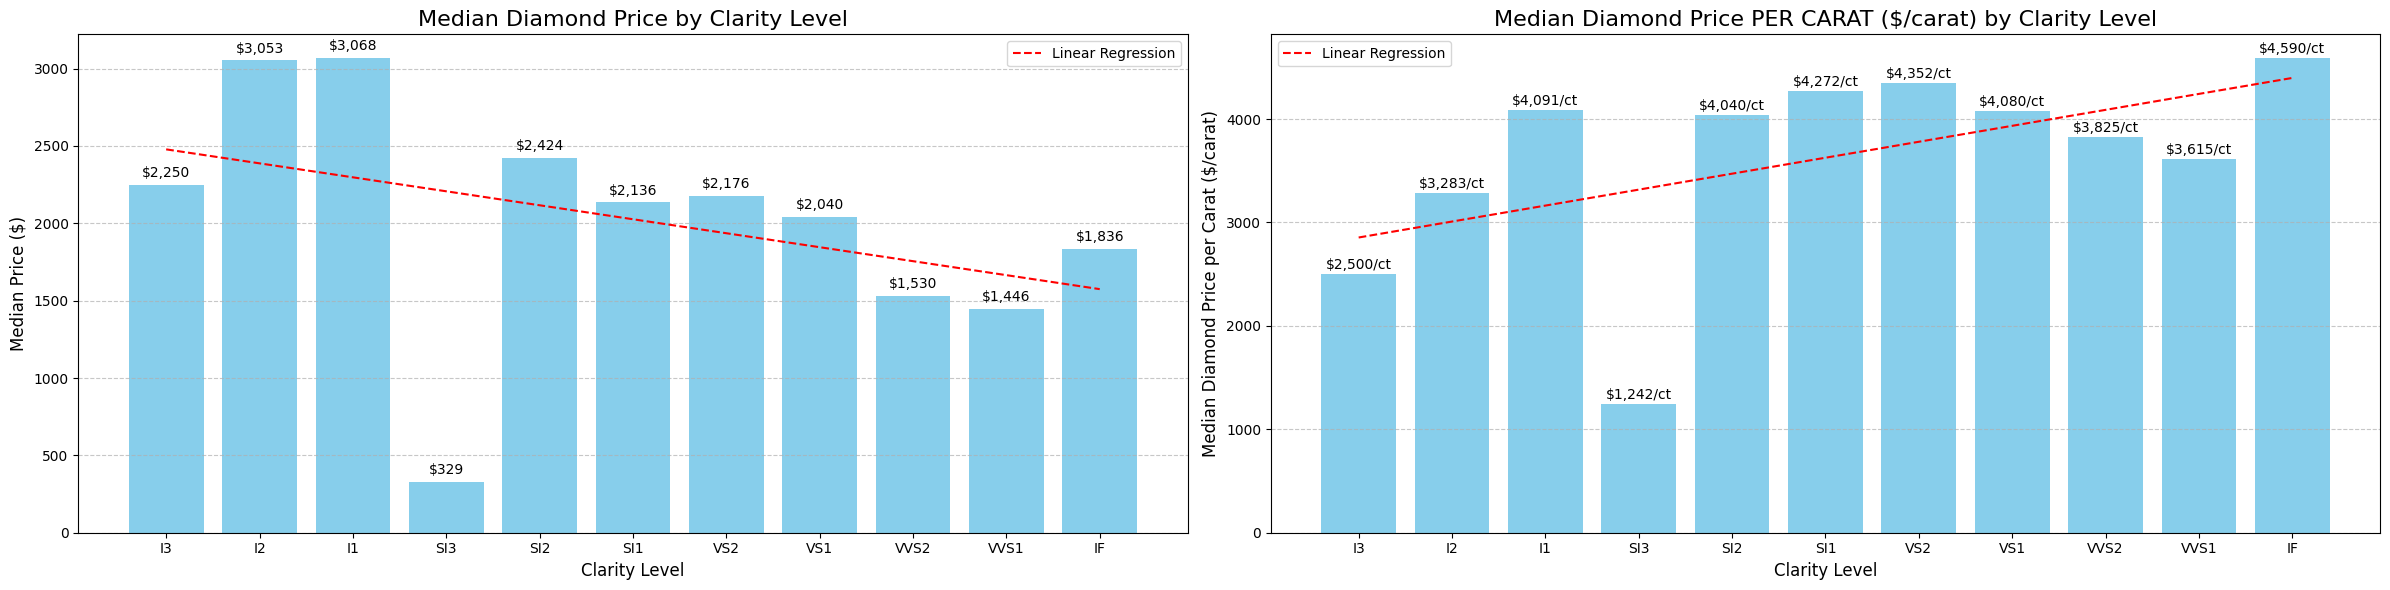

In [11]:
# I will create a figure with the two subplots side by side, so I can compare between them:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))
fig.subplots_adjust(wspace=0.4)

# ALEF: I will plot the median diamond prices for each clarity level in the first subplot:
clarity_order = ['I3', 'I2', 'I1', 'SI3', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
ax1.bar(clarity_order, clarity_medians[clarity_order], color='skyblue')
ax1.set_title('Median Diamond Price by Clarity Level', fontsize=16)
ax1.set_xlabel('Clarity Level', fontsize=12)
ax1.set_ylabel('Median Price ($)', fontsize=12)

# To also see the actual values on top of each bar (the median diamond price for each clarity level):
for i, v in enumerate(clarity_medians[clarity_order]):
   ax1.text(i, v + 50, f'${v:,.0f}', ha='center', fontsize=10)

ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the linear regression line to the plot, to see the trend of the median diamond prices:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(range(len(clarity_order)), clarity_medians[clarity_order])
x = np.array(range(len(clarity_order)))
ax1.plot(x, slope1*x + intercept1, color='red', linestyle='--', label='Linear Regression')
ax1.legend()

# Calculating the median carat weight for each clarity level:
carat_medians = dtf.groupby('clarity')['carat_weight'].median()
# VERY IMPORTANT STEP that took time to think- I normalize the prices (price per carat)!
normalized_medians = clarity_medians / carat_medians


# Second subplot - Normalized prices
ax2.bar(clarity_order, normalized_medians[clarity_order], color='skyblue')
ax2.set_title('Median Diamond Price PER CARAT ($/carat) by Clarity Level', fontsize=16)
ax2.set_xlabel('Clarity Level', fontsize=12)
ax2.set_ylabel('Median Diamond Price per Carat ($/carat)', fontsize=12)

# To also see the actual values on top of each bar (the median diamond price per carat for each clarity level):
for i, v in enumerate(normalized_medians[clarity_order]):
   ax2.text(i, v + 50, f'${v:,.0f}/ct', ha='center', fontsize=10)

ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the linear regression line to the plot, to see the trend of the median diamond prices per carat:
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(range(len(clarity_order)), normalized_medians[clarity_order])
ax2.plot(x, slope2*x + intercept2, color='red', linestyle='--', label='Linear Regression')
ax2.legend()

plt.tight_layout()
plt.show()

Looking at the left graph above, we can see that overall, <b>as the clarity level improves, the median diamond prices significantly decrease</b>.
<br>
<b><u>This observation is very odd, since the diamond prices should increase as the clarity level increases; but it seems not to be the case at first glance.</u></b>
<br>
<b>Nevertheless, after more closely inspecting possible reasons for this anomaly, I will present the reason that most likely explains this matter:</b>
<br>

#### Better clarity level does indeed increase diamond prices; however, we should also take into account the carat_weight of the diamond! <b>It turns out that as the clarity level improves, the median carat_weight of diamonds at that clarity level decreases. This is logical - this introduces a trade-off for the customer between diamonds with better clarity level, while having smaller carat_weight (or vice versa).</b>

#### <b>In order to verify this hypothesis, we can take a look at the right graph above; we can see that when we look at the median diamond price <i><u>PER CARAT</u></i>, meaning that we neutralize the factor of carat_weight, <u>we can see that indeed the diamond price increases as the clarity level improves, as we would expect in the first place!</u></b>
To conclude, we can see that delving deeper into exploring the nature of the connection between the clarity level and diamond price was crucial to understand the real relationship between clarity level and diamond price; while it seemed at first glance that there is an inverse relationship between them, actually there is a direct relationship between them, when observing price per carat.

---

### <b><u>Visualization #4</u>: Analysis of categorical columns having non-trivial "unknown" values:</b>
### Why did I choose this visualization?
At first glance, using the 'isna()' function we have learned in class, it seems that there aren't many columns with too many missing values, as shown below:


In [12]:
# Presenting the numbber of missing values in each column of the dataset, and their percentage of the total number of rows:
missing_values = dtf.isna().sum()
missing_values_percentage = dtf.isna().mean() * 100
missing_values_percentage = missing_values_percentage.round(2)
missing_values_percentage = missing_values_percentage.astype(str) + '%'
missing_values_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
print("Number of missing values in each column of the dataset, and their percentage of the total number of rows:")
missing_values_df.sort_values(by='Percentage', ascending=False)



Number of missing values in each column of the dataset, and their percentage of the total number of rows:


,Missing Values,Percentage
fluor_intensity,143491,65.31%
fancy_color_overtone,1650,0.75%
cut,0,0.0%
meas_length,0,0.0%
fancy_color_intensity,0,0.0%
fancy_color_secondary_color,0,0.0%
fancy_color_dominant_color,0,0.0%
fluor_color,0,0.0%
girdle_max,0,0.0%
girdle_min,0,0.0%


On the surface, it seems like there aren't many columns which are massively missing values - the only really problematic column we can observe from the table above is "fluor_intensity".
<br>
Although, after a more thorough examination of the nature of the data in our dataset, this is absolutely not the case; as noted above, this dataset includes 18 categorial columns, out of the 25 columns in total (more than 72% of the columns in this dataset are categorial).
<br>
The tricky point is that some categorial columns in this dataset contain the value "unknown"; <b>this value isn't recognized as a missing value using the isna() function, but in fact they are missing values.</b>
<br>
### Why is this visualization significant for the task at hand?
#### <b>I will show below that the column which is currently suspected as most problematic in terms of missing values ("fluor_intensity", having 65.31% missing values) is absolutely not the main reason for concern - <u>there are columns in which more than 99% of the rows have missing values!</u> This is an important observation which may be used for further improvements for the model, which as mentioned cannot be found without delving deeper into the nature of the data, beyond simply using the isna() function.</b>
<br> I will delve into that later, but for now I will briefly note that in the Error Analysis section of this assignment, when analyzing commonalities between erroneous samples, we will find out that on certain problematic features, one of the commonalities is having this "unknown" value, which is not null, but a real value in the datset, which should be dealt with as future work when we will be asked to improve the model.

Since we have already observed the numeric columns using isna(), and numeric columns cannot contain "unknown" value, now we focus on the 18 categorial columns:

In [13]:
# Taking only the categorial columns (we can find them by selecting the columns with the type 'object'):
categorialCols = dtf.select_dtypes(include=['object']).columns

# Making sure that indeed the 18 categorial columns are detected (and not more or less) - this is what should be according to the dataset description on Kaggle:
print("According to the dataset description on Kaggle, there should be 18 categorial columns. The number of categorial columns found is:", len(categorialCols))


According to the dataset description on Kaggle, there should be 18 categorial columns. The number of categorial columns found is: 18


{'cut': 0, 'color': 9162, 'clarity': 0, 'cut_quality': 60607, 'lab': 0, 'symmetry': 0, 'polish': 0, 'eye_clean': 156916, 'culet_size': 85740, 'culet_condition': 204384, 'girdle_min': 83432, 'girdle_max': 84295, 'fluor_color': 203977, 'fluor_intensity': 143619, 'fancy_color_dominant_color': 210539, 'fancy_color_secondary_color': 218641, 'fancy_color_overtone': 219315, 'fancy_color_intensity': 210541}
{'cut': 0.0, 'color': 4.170175191053377, 'clarity': 0.0, 'cut_quality': 27.58587729798865, 'lab': 0.0, 'symmetry': 0.0, 'polish': 0.0, 'eye_clean': 71.42187407545642, 'culet_size': 39.02541157835805, 'culet_condition': 93.02740517880957, 'girdle_min': 37.974902481987044, 'girdle_max': 38.367705493325076, 'fluor_color': 92.84215509119129, 'fluor_intensity': 65.36961261339171, 'fancy_color_dominant_color': 95.82891448910574, 'fancy_color_secondary_color': 99.5166201644948, 'fancy_color_overtone': 99.82339795087005, 'fancy_color_intensity': 95.82982480894663}


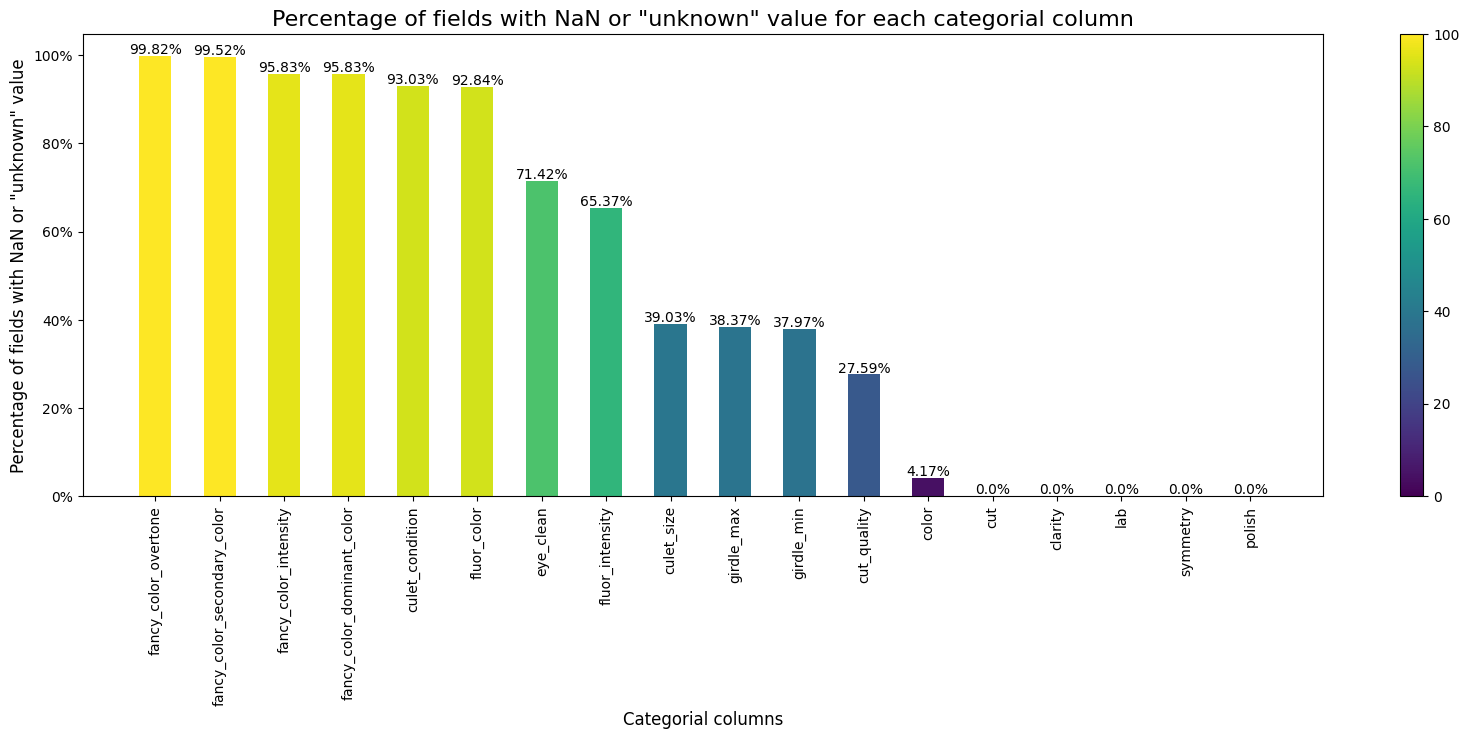

In [14]:
# Now, for each categorial column, I will count the number of fields which are NaN or with value="unknown":
# I will save this information in a dictionary, where the key is the column name and the value is the number of fields with NaN or "unknown" value.
nanDict = {}
for col in categorialCols:
    nanDict[col] = len(dtf[dtf[col].isnull() | (dtf[col] == "unknown")])

# Print the dictionary to see that results before the graph:
print(nanDict)

# Now, I will create another dictionary, now the value will be the percentage of fields with NaN or "unknown" value for each categorial column:
nanDictPerc = {}
for key in nanDict.keys():
    nanDictPerc[key] = nanDict[key] / len(dtf) * 100

print(nanDictPerc)

# sorting nanDictPerc by values:
nanDictPerc = dict(sorted(nanDictPerc.items(), key=lambda item: item[1], reverse=True))

# Now, I will create a plot, showing the percentage of fields with NaN or "unknown" value for each categorial column:
plt.figure(figsize=(20, 6))
plt.bar(nanDictPerc.keys(), nanDictPerc.values(), width=0.5)
plt.ylabel('Percentage of fields with NaN or "unknown" value', fontsize=12)
plt.xlabel('Categorial columns', fontsize=12)
plt.xticks(rotation=90)
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.title('Percentage of fields with NaN or "unknown" value for each categorial column', fontsize=16)

# Showing the value (really the number) of each bar, to see the exact percentage:
for i, v in enumerate(nanDictPerc.values()):
    plt.text(i, v + 0.5, str(round(v, 2)) + "%", ha='center')

# Making the color of each bar represent the percentage of fields with NaN or "unknown" value, where the higher the percentage, the darker the color:
plt.bar(nanDictPerc.keys(), nanDictPerc.values(), width=0.5, color=plt.cm.viridis(np.array(list(nanDictPerc.values())) / max(nanDictPerc.values())))
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=100))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())

plt.show()

<b>This visualization helps us detect columns which we might want to delete. As we learned in class, when there are not many missing values in a column, it is common to fill these values (for example, with the mean value of that column); however, when having a column which mostly consists of missing values, it should be considered to remove this column.</b>
<br>
### As we can see from the visualization above, there are 8 columns having more missing values than real values! Even more so, 6 columns have more than 90% missing values, while the worst of them is the 'fancy_color_overtone' column, having 99.82% missing values!
<br>
Therefore, it was crucial to delve deeper into the nature of the data in our dataset, and observe that using the isna() function doesn't really reflect the missing values in this particular dataset. We will see later on (in the Error Analysis section in this assignment) that this observation will become helpful, as we will see that some of these columns missing many values are found as sabotaging the model!

---

### <b><u>Visualization #5</u>: Analyzing the relationship between 'meas_depth' and the diamond price:</b>
### Why did I choose this visualization?
As I explained in the visualizations above, when we computed Pearson correlation, the correlation coefficient between 'meas_depth' and the target variable was 0.22, quite low. However, surprisingly, when I computed the correlation coefficient of the feature-pair of 'carat_weight' and 'meas_depth', the correlation coefficient was 0.91.
<br>
This is a very high correlation coefficient and doesn't make sense, since at first glance the pearson correlation between 'meas_depth' and the target variable is quite low.

#### <b>Therefore, I chose this visualization to explore this matter; and, as I will explain below, we can identify the reason for this difference.</b>

Let's see a scatter plot describing the relationship between 'meas_depth' and 'total_sales_price' features:

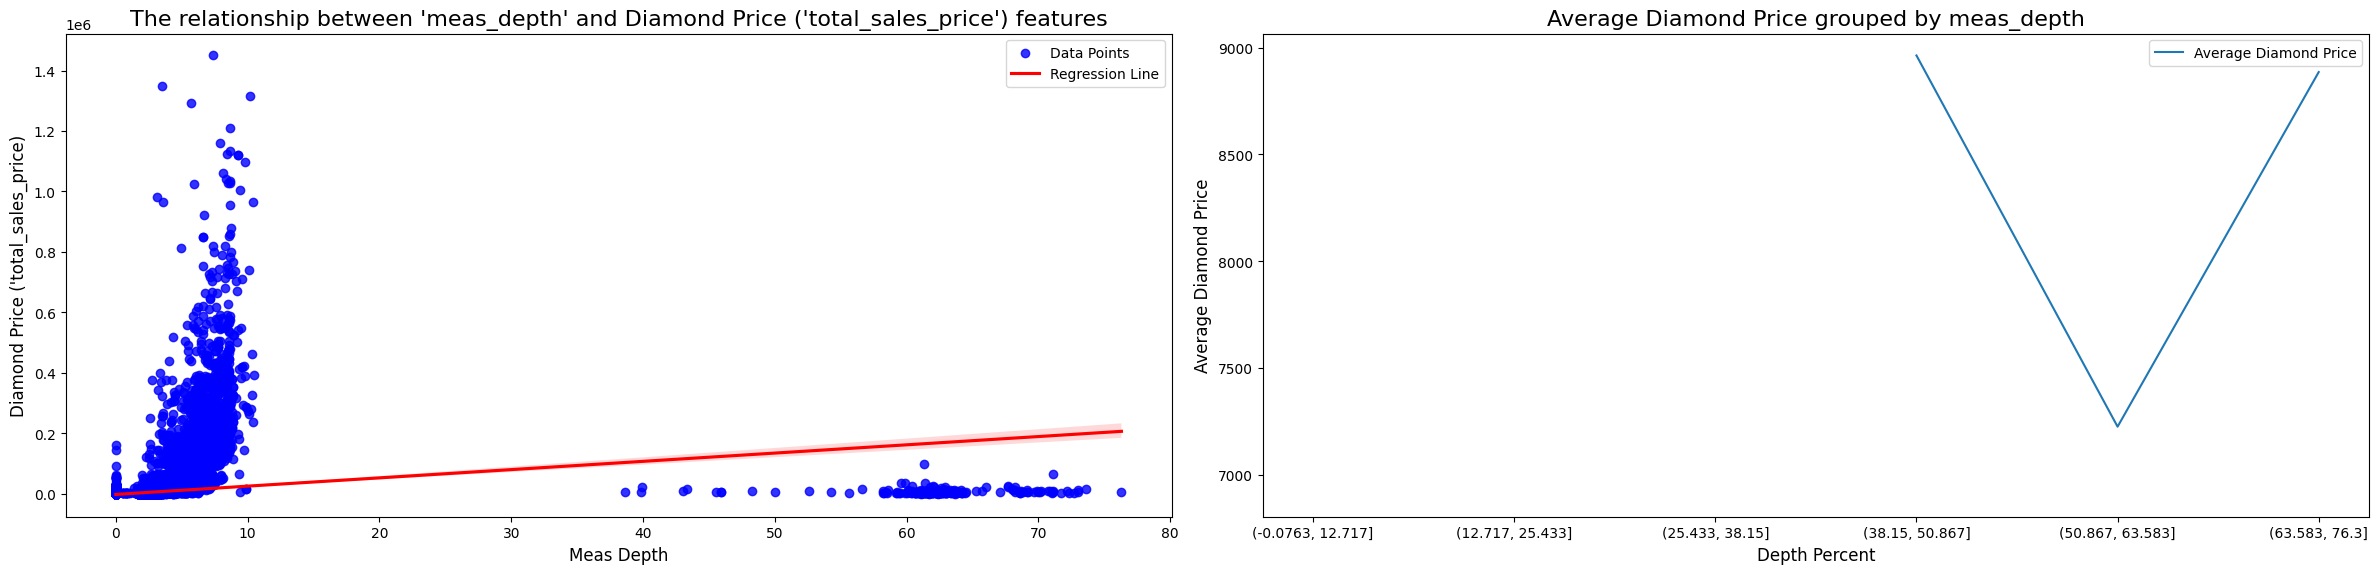

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

# First subplot - Scatter plot with regression line
plt.sca(ax1)
plt.title("The relationship between 'meas_depth' and Diamond Price ('total_sales_price') features", fontsize=16)
sns.regplot(data=dtf, x='meas_depth', y='total_sales_price', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel("Meas Depth", fontsize=12)
plt.ylabel("Diamond Price ('total_sales_price)", fontsize=12)
plt.legend(['Data Points', 'Regression Line'])

# Second subplot - Line plot of average prices
plt.sca(ax2)
dtf.groupby(pd.cut(dtf['meas_depth'], 6))['total_sales_price'].mean().plot(kind='line')
plt.title('Average Diamond Price grouped by meas_depth', fontsize=16)
plt.xlabel('Depth Percent', fontsize=12)
plt.ylabel('Average Diamond Price', fontsize=12)
plt.legend(['Average Diamond Price'])

plt.tight_layout()
plt.show()

As can be observed, there are two "areas" in the left graph - there are many diamonds with 'meas_depth' value between 0-10, and there are less but still not a negligible amount of diamonds with 'meas_depth' value between appriximately 40-75 (mainly around approximately 60-75). We can observe that <u>there are no</u> diamonds having a 'meas_depth' value between approximately 10-38.
<br><br>
However, it is hard to see the trend of the data points, and we can already suspect based on the distribution of the data points that even if there is a relationship between the two features - it would probably be a non-linear one.
<br>
<b>Similar to what we did in class, while the left plot is difficult to read, we can bin the depth percent then group by and view the mean price, as shown in the right graph.</b>
<br>
<b>As can be seen, when grouping the data by the 'meas_depth' feature, we can now see that until a depth of approximately 60%, the average diamond price is decreasing, but after that, it starts to increase!</b>
<br>

#### <b>When looking at the graph, we can observe that it looks like there is a <i>non-linear</i> relationship between the 'depth_percent' and the diamond price!</b> To find out whether this is the case, I will use the Spearman correlation:

In [17]:
# Finding non-linear correlation between 'meas_depth' and 'total_sales_price' using Spearman's rank correlation::
spearman_corr, _ = stats.spearmanr(dtf['meas_depth'], dtf['total_sales_price'])
print(f"Spearman's rank correlation between 'meas_depth' and 'total_sales_price': {spearman_corr:.2f}")

Spearman's rank correlation between 'meas_depth' and 'total_sales_price': 0.87


And, indeed as we suspected, we can see that there is a non-linear correlation between 'meas_depth' and 'total_sales_price' features, <b>as the Spearman's rank correlation is 0.87, which is a very high value for a correlation coefficient.</b>
#### This may explain why combining 'meas_depth' with the 'carat_weight' feature yields a high correlation coefficient, because now we understand that although the PEARSON correlation coefficient is not high, the non-linear correlation is high, and this is why the combined feature has a high correlation coefficient with the target variable.

### Why is this visualization significant for the task at hand?
As noted, when we computed Pearson correlation, the correlation coefficient between 'meas_depth' and the target variable was 0.22, quite low. However, surprisingly, when I computed the correlation coefficient of the feature-pair of 'carat_weight' and 'meas_depth', the correlation coefficient was 0.91. At first glance, this seems very odd, and doesn't lead to a consistent conclusion regarding the the nature of the relationship between the 'meas_depth' feature and the diamond price; therefore, as part of understanding the nature of the data in the dataset I chose (which is a goal in the EDA process), I was curious to find out whether this initial observation is misleading, and may be explained by other factors.
<br>Indeed, as explained above, we found out that this observation is somewhat misleading since when looking at the graph describing the relationship between the 'meas_depth' feature and the diamond price (and also by computing spearman's correlation coefficient for non-linear relationship), it is clear that the issue was that indeed there is no strong <i>linear</i> relationship between the 'meas_depth' feature and the diamond price; however, there is a strong relationship when looking at a non-linear relationship.

<i>Before ending the visualizations section, I would like to note that I considered whether it is worth to switch one of the visualizations with a Q-Q-Plot, to assess the normality of the target variable.
<br>
However, I came to the conclusion that the Q-Q-Plot is less relevant in this case, as we are using XGBoost, which is a tree-based model, and not a linear regression model (and unlike many models, it does not assume normality of the target variable).
<br>
Therefore, I decided to keep the visualizations, and not to include a Q-Q-Plot in this section.</i>

---

# 2.5. Data Cleaning and Preprocessing:
As shown above, this datset includes 25 features: 18 of them are categorial and 7 of them are numerical. <br>
#### Namely, more than 70% of the features in this dataset are categorial!<br>
#### Therefore, since it is not logical to train a model ignoring 70% of the features, I will now deal with the categorial features, by doing One-Hot-Encoding.
<i>It should be noted that as part of future work, it would be interesting to test whether using other methods to deal with categorial features (especially applying ordinal encoding on the relevant features) would achieve better performance. This is probably one of the things that will be interesting to explore as part of future work, in the next exercise when we will be asked to improve our model's performance based on observations we noticed during this work.</i>
Since data cleaning is not an integral part of this assignment, I will deal with the necessary preparations required before training the model - which is required as part of this assignment (filling null values & dealing with categorial columns).
<br>


In [14]:
# First of all, as we did in class, we divide the data into training and testing sets:
# Using 80% of the data for training and 20% for testing, and setting a random seed for reproducibility (we want to get the same results every time we run the code, and I saw that it is a common value to use):
dtf_train, dtf_test = train_test_split(dtf, test_size=0.2, random_state=42)

Similar to what we have verified in class, checking that the distribution of the target variable is similar in the training and testing sets:

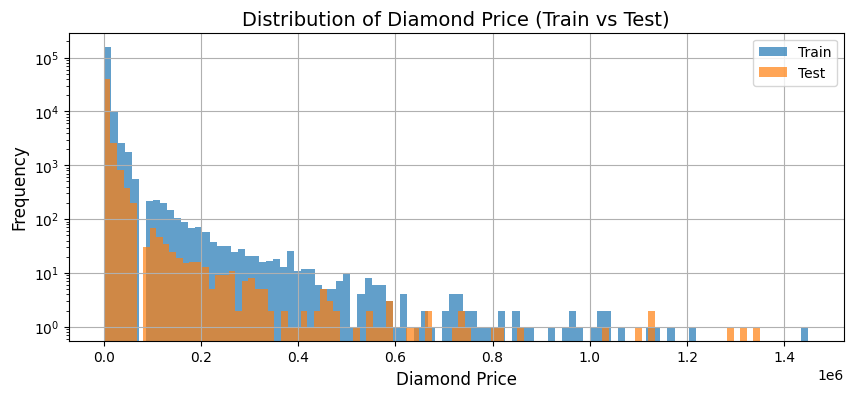

In [19]:
fig, ax = plt.subplots(figsize=(10, 4))

# Applying log scale to the x-axis for better visualization:
dtf_train.total_sales_price.hist(ax=ax, bins=100, alpha=0.7, label='Train', log=True)
dtf_test.total_sales_price.hist(ax=ax, bins=100, alpha=0.7, label='Test')
ax.set_xlabel('Diamond Price', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Diamond Price (Train vs Test)', fontsize=14)
ax.legend()

plt.show()


<b>Indeed, the distribution of the target variable is similar in the training and testing sets, which is good because it means that the model will be trained on data that is representative of the test data, hence it is more probable to be able to generalize well to new data.</b>

**Filling null values**:
<br>
First, let's find out which columns have null values, and how much null values are present:

In [15]:
# Printing the number of missing values (for each column) in the training set:
dtf_train.isna().sum()

cut                                 0
color                               0
clarity                             0
carat_weight                        0
cut_quality                         0
lab                                 0
symmetry                            0
polish                              0
eye_clean                           0
culet_size                          0
culet_condition                     0
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                          0
girdle_max                          0
fluor_color                         0
fluor_intensity                114699
fancy_color_dominant_color          0
fancy_color_secondary_color         0
fancy_color_overtone             1311
fancy_color_intensity               0
total_sales_price                   0
dtype: int64

As we can see above, there are missing values in two columns:
- The "flour_intensity" column: contains 114,699 missing values.
- The "fancy_color_overtone" column: contains 1,311 missing values.
<br><br>
As we have learned in class, there are multiple approaches regarding how to deal with missing values (e.g. delete the relevant rows, filling with the mean value etc.).
In our case, the missing values are in categorial columns; in addition, as I have printed in the previous section, we can see that both these columns already have a categorial value of "unknown", so we will fill the missing values with "unknown" to remain consistent (in the next assignment, when we will be asked to improve the model, I think it would be worthwhile to try other methods for dealing with these missing values, but this is not the goal in this assignment, only performing required data cleaning for running the model):

In [16]:
# Filling missing values with "unknown" for the "fluor_intensity" and "fancy_color_overtone" columns:
dtf_train["fluor_intensity"] = dtf_train["fluor_intensity"].fillna("unknown")
dtf_test["fluor_intensity"] = dtf_test["fluor_intensity"].fillna("unknown")

# Filling missing values with "unknown" for the "fancy_color_overtone" column:
dtf_train["fancy_color_overtone"] = dtf_train["fancy_color_overtone"].fillna("unknown")
dtf_test["fancy_color_overtone"] = dtf_test["fancy_color_overtone"].fillna("unknown")

In [17]:
# Verifying that there are no missing values in the training set (after we have filled the missing values):
print(dtf_train.isna().sum())

cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64


#### Now, we finished dealing with missing values; we move on to deal with the categorial columns, applying One-Hot-Encoding.
**"One-Hot-Encoding" for categorical variables:**
<br>
We have more than 1 categorial column, so we can't use directly the code presented in class.
<br>
It should be noted that there are other solutions to applying One-Hot Encoding to multiple categorial columns, such as using the ColumnTransformer class from the scikit-learn library.
<br>
<i>However, to remain consistent with what we have learned in class, I will adapt the code from the class to work with multiple categorial columns.</i>

In [18]:
# Taking only the categorial columns (we can find them by selecting the columns with the type 'object'):
categorialCols = dtf.select_dtypes(include=['object']).columns

# Taking the categorial columns which are defined as categorial in the dataset description on Kaggle:
cols = ["cut","color", "clarity","cut_quality", "lab", "symmetry", "polish", "eye_clean", "culet_size", "culet_condition", "girdle_min", "girdle_max", "fluor_color", "fluor_intensity", "fancy_color_dominant_color",
        "fancy_color_secondary_color", "fancy_color_overtone", "fancy_color_intensity"]

# Checking whether the columns in the list "cols" are the same as the categorial columns detected:
if set(cols) == set(categorialCols):
    print("Verified that 18 categorial columns are detected, as written in the dataset description on Kaggle.")

Verified that 18 categorial columns are detected, as written in the dataset description on Kaggle.


In [19]:
# 'cols' are the categorial columns that we want to convert to dummy columns:
# So, now we use the code presented in class, and convert each such categorial feature to dummy columns and add them to the dataframe:
for col in cols:
    dummy_train = pd.get_dummies(dtf_train[col], prefix=col)
    dtf_train = pd.concat([dtf_train, dummy_train], axis=1)
    dtf_train = dtf_train.drop(col, axis=1)
    
    dummy_test = pd.get_dummies(dtf_test[col], prefix=col)
    dtf_test = pd.concat([dtf_test, dummy_test], axis=1)
    dtf_test = dtf_test.drop(col, axis=1)
    

#### At that point, it is important to make sure that the train and test sets have the same number of columns after applying One-Hot-Encoding to the categorial columns, otherwise the model will not be able to make predictions on the test set.
The problem may arise if the train and test sets have different values in the categorial columns, which will result in different dummy columns being created for the train and test sets.
<br>
It should be noted that in other implementations of One-Hot-Encoding, this problem is already taken care of, but I sticked to the code presented in class, so I will add below code dealing with this issue.

In [20]:
# We check whether the train and test sets have the same number of columns after converting the categorial columns to dummy columns, doing One-Hot-Encoding to the categorial columns:
if len(dtf_train.columns) == len(dtf_test.columns):
    print("The train and test sets have the same number of columns after applying One-Hot-Encoding to the categorial columns.")
else:
    print("The train and test sets have different number of columns after applying One-Hot-Encoding to the categorial columns.")
    print("Num of columns in the train set is:", len(dtf_train.columns), ". The num of columns in the test set is:", len(dtf_test.columns))


The train and test sets have different number of columns after applying One-Hot-Encoding to the categorial columns.
Num of columns in the train set is: 152 . The num of columns in the test set is: 143


So, we understand that there are 152 columns in the train set, but only 143 columns in the test set.
<br>
This does not necessarily mean that there are 9 more columns in the train set; maybe 10 columns appear only in the train set, but 8 appear only in the test set. Therefore, I will check whether this is the case:

In [21]:
# We print the columns which appear in the training set, but do not appear in the test set:
cols_only_in_train = [x for x in dtf_train.columns if x not in dtf_test.columns]
print("columns which appear in the training set, but do not appear in the test set:", cols_only_in_train)

# We print the columns which appear in the test set, but do not appear in the training set:
cols_only_in_test = [x for x in dtf_test.columns if x not in dtf_train.columns]
print("columns which appear in the test set, but do not appear in the training set:", cols_only_in_test)


columns which appear in the training set, but do not appear in the test set: ['cut_quality_Fair', 'cut_quality_Ideal', 'polish_Fair', 'culet_size_EL', 'culet_size_VL', 'girdle_max_STN', 'fancy_color_dominant_color_Other', 'fancy_color_secondary_color_Red', 'fancy_color_overtone_Grayish']
columns which appear in the test set, but do not appear in the training set: []


From the results of the code cell above, we can clearly see that there are 9 columns which appear in the train set, but not in the test set.
<br>
On the other hand, as we have verified in the code cell above, there are no columns appearing only in the test set (and not in the train set).
<br>
Let's see the nature these columns, that appear only in the train set:

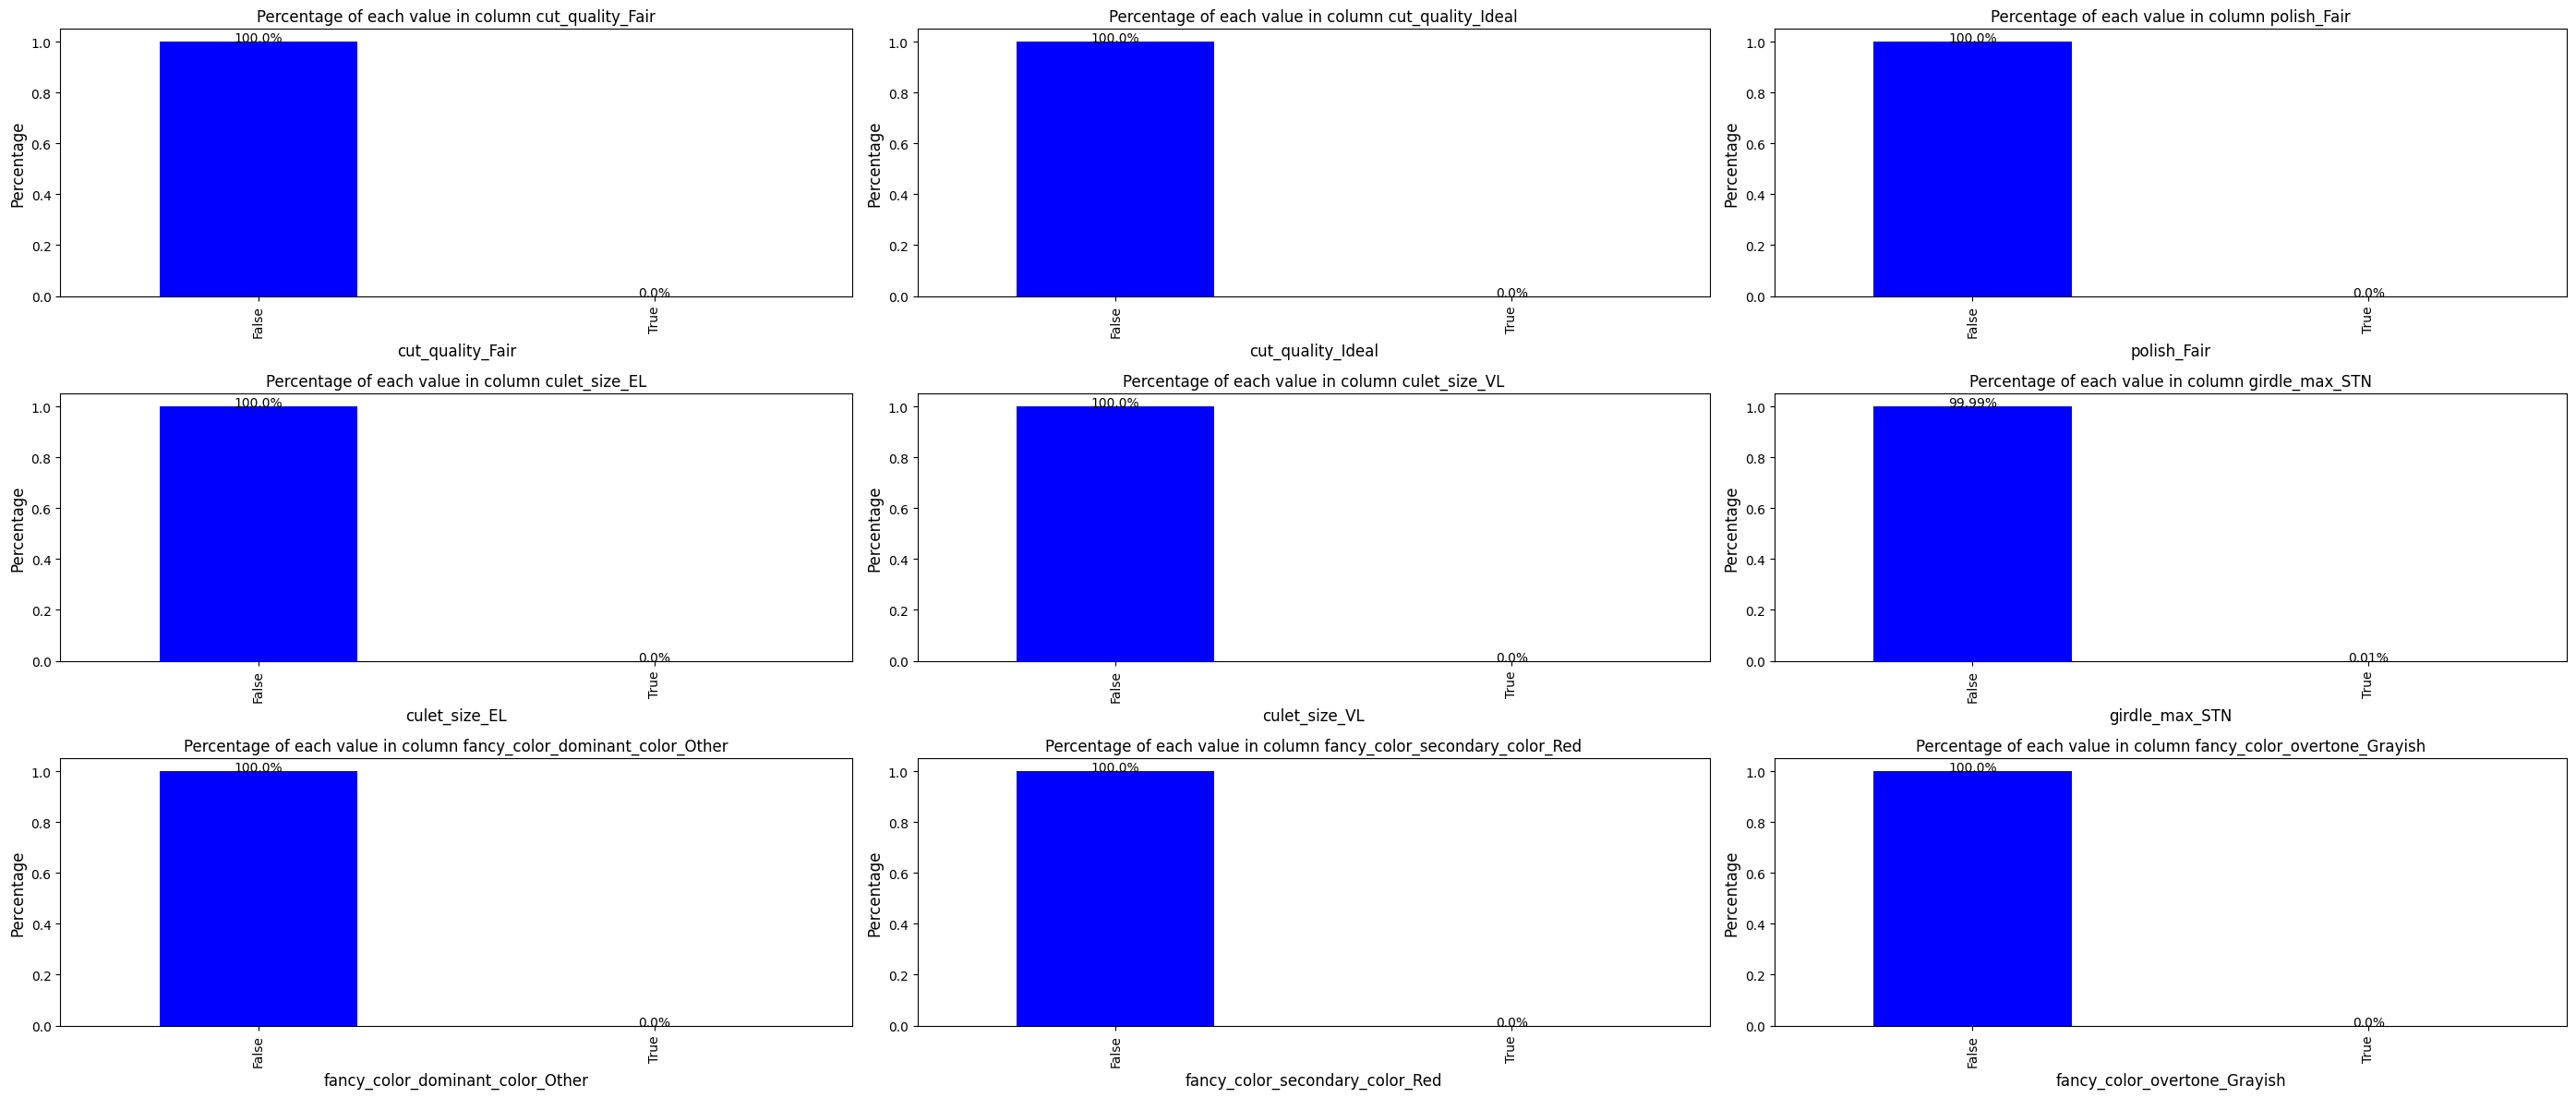

In [22]:
# Drawing a graph showing the different values of each column in cols_only_in_train, presenting the percentage of each value:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(28, 12))
axes = axes.flatten()

for i, col in enumerate(cols_only_in_train):
    dtf_train[col].value_counts(normalize=True).plot(kind='bar', color='blue', ax=axes[i])
    axes[i].set_ylabel('Percentage', fontsize=12)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_title('Percentage of each value in column ' + col, fontsize=12)
    for j in range(len(dtf_train[col].unique())):
        axes[i].text(j, dtf_train[col].value_counts(normalize=True)[j], 
                     str(round(dtf_train[col].value_counts(normalize=True)[j]*100, 2)) + "%", ha='center')

plt.tight_layout()
plt.show()


#### We can see that 100% of the records in the train have 'False' value for each of the columns that appear only in the train set! Therefore, we can drop these columns from the train and test sets, as they do not provide the model any extra information! (thus also fixing the problem of unmatching number of columns, between the train set and the test set).

In [23]:
# Removing from the train set these columns which are in the training set but not in the test set:
missingCols = [x for x in dtf_train.columns if x not in dtf_test.columns]
dtf_train = dtf_train.drop(missingCols, axis=1)


Now, we can run the same code we ran above, now it should detect and indicate that the train set and the test set have the same number of columns:

In [24]:
# We check whether the train and test sets have the same number of columns after converting the categorial columns to dummy columns, doing One-Hot-Encoding to the categorial columns:
if len(dtf_train.columns) == len(dtf_test.columns):
    print("The train and test sets have the same number of columns after applying One-Hot-Encoding to the categorial columns, which is", len(dtf_train.columns), "columns.")
else:
    print("The train and test sets have different number of columns after applying One-Hot-Encoding to the categorial columns.")
    print("Num of columns in the train set is:", len(dtf_train.columns), ". The num of columns in the test set is:", len(dtf_test.columns))


The train and test sets have the same number of columns after applying One-Hot-Encoding to the categorial columns, which is 143 columns.


<b> Indeed, we see above that the train and test sets have the same number of columns after converting the categorial columns to dummy columns, doing One-Hot-Encoding to the categorial columns.
<br>
Now, we can move on to the next step, which is building a machine learning model to predict the price of diamonds.</b>

---

### <b>3. Basic Model Pipeline</b>

#### To create a machine learning model to predict the price of diamonds, as we did in class, we first need to separate the features (X) from the target variable (y) in the training and test sets.

In [25]:
# Separating X from y (X are the features, y is the target variable):
X_train = dtf_train.drop('total_sales_price',axis=1)
X_test = dtf_test.drop('total_sales_price',axis=1)

y_train = dtf_train['total_sales_price']
y_test = dtf_test['total_sales_price']

#### Using <b>XGBoost regressor</b> to train a model to predict the price of diamonds:
<i>Note: although we used linear regression in class, the assignment guidelines suggested using XGBoost regressor, so I used it.</i>

In [26]:
# Initializing the XGBoost regressor model:
xgb_model = XGBRegressor()

# Training the model on the training data (fitted to the training data):
xgb_model.fit(X_train, y_train)

# Now, we can make predictions on the test data:
prediction = xgb_model.predict(X_test)

#### Now, after we have made the predictions, we can start evaluating the model using evaluation metrics we have imported above.
What evaluation metrics will I use?
- <b>$R^2$ (Coefficient of Determination)</b>.
- <b>MAE (Mean Absolute Error)</b>.
- <b>MAPE (Mean Absolute Percentage Error)</b>.
- <b>RMSE (Root Mean Squared Error)</b>.

#### First, just as a preview, before the "Error Analysis" section in this assignment, I will present the 4 scores, for each of these evaluation metrics. Then, in the "Error Analysis" section below, for each of these evaluation metrics, I will first present it and explain its meaning, formula etc., then do the practical calculation of this evaluation metric on our model, and finally I will conclude the results received:

In [32]:
# Evaluating the model using the evaluation metrics we have imported above:
xgb_r2 = r2_score(y_test, prediction)
xgb_mape = mean_absolute_percentage_error(y_test, prediction)
xgb_mae = mean_absolute_error(y_test, prediction)
xgb_rmse = np.sqrt(mean_squared_error(y_test, prediction))

# Print the evaluation metrics
print(f"R^2 Score: {xgb_r2:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {xgb_mape:.3f}")
print(f"Mean Absolute Error (MAE): {xgb_mae:.0f}")
print(f"Root Mean Squared Error (RMSE): {xgb_rmse:.0f}")


R^2 Score: 0.856
Mean Absolute Percentage Error (MAPE): 0.145
Mean Absolute Error (MAE): 1141
Root Mean Squared Error (RMSE): 10567


---

### <b>4. Error Analysis</b>

First, let's explain the meaning of the $R^2$ score we got:

- <b>$R^2$ (Coefficient of Determination)</b>: ranging until 1, 0 meaning that the model does not explain the variance of the target variable, and 1 meaning that the model explains all the variance of the target variable ("prefect predictions"); i.e. for a good model, $R^2$ will be close to 1.
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
Let's calculate the $R^2$ for our model:

In [33]:
xgb_r2 = r2_score(y_test, prediction)
print(f"R^2 Score: {xgb_r2:.3f}")

R^2 Score: 0.856


As we can see above, our model achieved an $R^2$ score of 0.856; this means that 85.6% of the variance in the target variable is explained by our model. This is a high pecentage, can be better, but it works well.

----

## <b>On which items the model performs the worst? The best? Why do you think that is?</b>

<i>When considering how well the model performs, there are two ways to analyse this question:</i>
- <u><font size="6"><b>Looking at the error value:</b></u></font><br>
<b><u>I will show <font size="6">3</font> visualizations & calculations</u></b> showing that when looking at errors values, they increase as the diamond price increases.
<br><br>

- <u><font size="6"><b>Looking at the error in percents:</b></u></font><br>
<b><u>I will show <font size="6">2</font> visualizations & calculations</u></b> showing that when looking at errors in percents of the price, they increase as the diamond price decreases.

<br>
<b>To understand the model's performance on different diamonds, let's analyze and plot the <i><u>residuals</u></i>:</b>

#### <b>A. Considering the <i>value</i> of errors</b>:

In [34]:
# Align prediction with y_test indices
if isinstance(prediction, np.ndarray):
    prediction = pd.Series(prediction, index=y_test.index)

# Compute residuals
residuals = y_test - prediction

# Finding the worst prediction
max_error = residuals.abs().max()
max_idx = residuals[residuals == max_error].index[0]
max_true, max_pred = y_test.loc[max_idx], prediction.loc[max_idx]
print("We find the worst prediction in the test set:")
print("Max Error:", "${:,.0f}".format(max_error))
print("True value:", "${:,.0f}".format(max_true))
print("Predicted value:", "${:,.0f}".format(max_pred))


We find the worst prediction in the test set:
Max Error: $1,026,258
True value: $1,292,500
Predicted value: $266,242


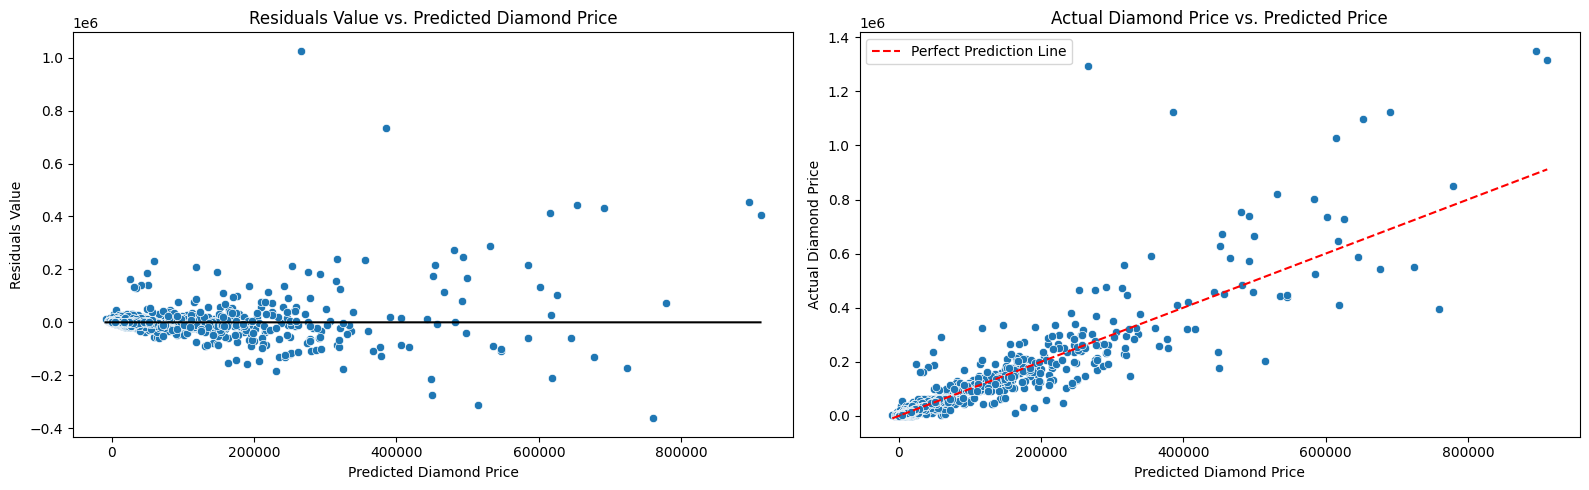

In [35]:
# Plotting the residuals values and the scatter plot of predictions vs. true values side by side:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plotting the residuals values:
sns.scatterplot(x=prediction, y=residuals, ax=axes[0])
sns.lineplot(x=prediction, y=0, ax=axes[0], color='black')
axes[0].set_title("Residuals Value vs. Predicted Diamond Price")
axes[0].set_xlabel('Predicted Diamond Price')
axes[0].set_ylabel('Residuals Value')

# Scatter plot of predictions vs. true values:
sns.scatterplot(x=prediction, y=y_test, ax=axes[1])
sns.lineplot(x=prediction, y=prediction, ax=axes[1], color='red', linestyle='--', label='Perfect Prediction Line')
axes[1].set_title('Actual Diamond Price vs. Predicted Price')
axes[1].set_xlabel('Predicted Diamond Price')
axes[1].set_ylabel('Actual Diamond Price')
axes[1].legend()

plt.tight_layout()
plt.show()


#### <b>We can see from the two graphs above that our bigger mistakes are when the diamond prices are larger (very expensive diamonds); this can be observed when looking at the actual diamond price vs. the predicted diamond price and also when looking at the residual value vs. the predicted diamond price. The presentation of the data in actual values and residual values helps to verify that indeed higher diamond prices have higher value of prediction error.

#### <b>In other words, overall, we can see that as the diamond price is higher, the error <i>value</i> is higher!</b>

<br>

### Let's see further support for this claim, by analyzing the RMSE score which our model gets, and comparing to MAE:
- <b>RMSE (Root Mean Squared Error)</b>: The RMSE is a measure of the average deviation of the predicted values from the actual values. It helps us measure the accuracy of a model. <i>It should be noted that this evaluation metric penalizes large errors more than small errors!</i> It also should be noted that RMSE is more sensitive to outliers, compared to MAE. <b><u>In particular, if RMSE is much larger than MAE, it suggests that there are significant outliers in the predictions,</u> and this is exactly the case in our dataset, as will be shown below.</b> Like MAE, small RMSE values are better.
$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

Let's calculate the RMSE for our model:


In [36]:
xgb_rmse = np.sqrt(mean_squared_error(y_test, prediction))
print(f"Root Mean Squared Error (RMSE): {xgb_rmse:.0f}")

Root Mean Squared Error (RMSE): 10567



- <b>MAE (Mean Absolute Error)</b>: The average of the absolute differences between the predicted and actual values. It gives an idea of how wrong the predictions are. It is expressed in the same units as the variable (on the contrary to MAPE, which I will cover below). Therefore, there are no general values which can be considered as good or bad, it is scale-dependant.
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$
Let's calculate the MAE for our model:

In [37]:
xgb_mae = mean_absolute_error(y_test, prediction)
print(f"Mean Absolute Error (MAE): {xgb_mae:.0f}")

Mean Absolute Error (MAE): 1141


#### <b>As we can see above, our model got an RMSE score of 10,567, and an MAE score of 1141. In other words, the RMSE score is significantly higher, it is more than 825% higher than the MAE score for our model! Since RMSE squares the errors (making large errors more significant) while MAE treats all errors linearly, this means there are larger errors in the model's predictions</b>.
<br>

#### <b>B. Considering the errors in <i>percents</i></b>:


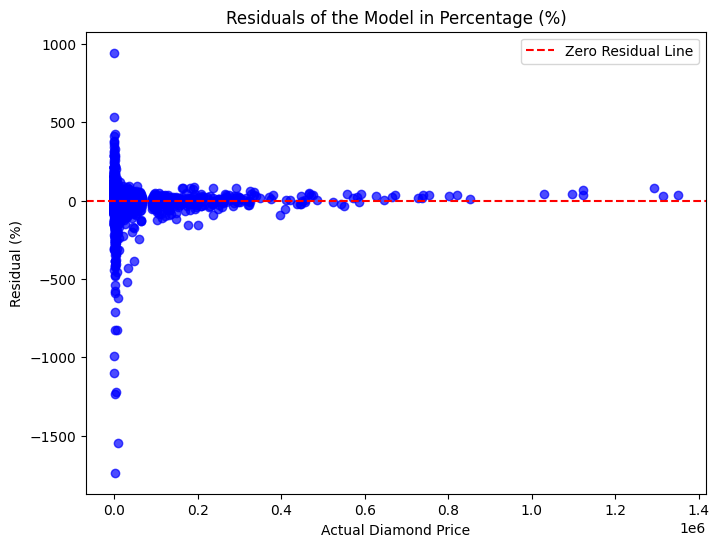

In [38]:
# Visualize residuals
residuals = y_test - prediction
residualsInPercent = residuals / y_test * 100
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residualsInPercent, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residuals of the Model in Percentage (%)')
plt.xlabel('Actual Diamond Price')
plt.ylabel('Residual (%)')
plt.legend()
plt.show()


#### However, when looking at the value of errors in percents, we can see that the more significant residuals (in percents) are around the lower values of the target variable. <b><i>This means that the model is not performing well on the lower values of the target variable! In other words, when looking on the error in percents compared to the price, and not on the value of the error, the model performs better on the higher values of the target variable, and worse on the lower values of the target variable</i></b>.

### Why this happens?

As we saw in the distribution of the target variable, the distribution is not normal, and the values are skewed to the right and therefore tends to have a higher prediction error for more expensive diamonds. When switching to analysis in percentage of diamond price this may change as it happens in our case because of a big difference between "cheap" diamonds and expensive diamonds which overshadows the previous effect that is related to the distribution skew.

<b><i>As I already mentioned, in the next assignment, when we will be asked to improve the model's performance based on the insights from this assignment, it would be interesting to explore whether apllying log-transformation to the target variable would improve the model's performance.</b></i>

### Let's see further support for this claim, by <i>further</i> understainding and analyzing the MAE score which our model gets. As already outlines, the MAE is defined by:


- <b>MAE (Mean Absolute Error)</b>: The average of the absolute differences between the predicted and actual values. It gives an idea of how wrong the predictions are. It is expressed in the same units as the variable (on the contrary to MAPE, which I will cover below). Therefore, there are no general values which can be considered as good or bad, it is scale-dependant.
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$
Let's calculate again the MAE for our model:

In [39]:
xgb_mae = mean_absolute_error(y_test, prediction)
print(f"Mean Absolute Error (MAE): {xgb_mae:.0f}")

Mean Absolute Error (MAE): 1141


In [40]:
# To understand the meaning of this MAE result, computing the median price of diamonds in the whole dataset:
median_price = dtf.total_sales_price.median()
print(f"The median price of diamonds in the dataset is: ${median_price:.0f}")
mean_price = dtf.total_sales_price.mean()
print(f"The mean price of diamonds in the dataset is: ${mean_price:.0f}")

The median price of diamonds in the dataset is: $1970
The mean price of diamonds in the dataset is: $6908


#### As we can see above, our model achieved a MAE score of 1141; this means that the price predictions of our model are, on average, different by $1141.

<b>Since this is unit-dependant, I also calculated above the mean price & median price of diamonds in the dataset. Similar to what we have observed in the visualizations section, we get now another indication showing that our data is highly skewed - the mean diamond price ($6908) is much higher than the median diamond price ($1970). In other words, a small number of very expensive diamonds raise the mean, while the majority of diamonds are priced closer to the median.</b>

<b><u>It is important to understand that while the MAE score ($1141) is 16.5% of the mean diamond price ($6908), which is not ideal but not really terrible, in fact - the MAE score is 58% of the median price ($1970). This is unacceptable, as most of the diamonds are near the median, and not very expensive (relatively speaking).</u></b>

#### <b>In simple words, for "normal" and not super-expensive diamonds, for example - for a $2,000 diamons, the average error is over 50%! And the majority of diamonds in the dataset aren't such expensive, so there is plenty of room for improvement.</b>


<b><u>This suggests, even regardless of the residual-analysis, that the model may be performing better for high-priced diamonds (closer to the mean) than for lower-priced ones (closer to the median).</u> This conclusion might be useful in the next assignment, when we will be asked to improve the model - maybe applying log-transformation to the data may improve the model's overall performance, particularly for the majority of the dataset, which is near the median price.</b>

----

Looking at the percentage error:
- <b>MAPE (Mean Absolute Percentage Error)</b>: evaluating the accuracy of the model's predictions, in fact is describes the average percentage difference between the predicted and actual values; it is better to have lower MAPE values, 0% is optimal. And, on the contrary to MAE, it is scale-independent.
$$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100
$$


In [41]:
xgb_mape = mean_absolute_percentage_error(y_test, prediction)
print(f"Mean Absolute Percentage Error (MAPE): {xgb_mape:.3f}")

Mean Absolute Percentage Error (MAPE): 0.145


As we can see above, our model achieved a MAPE score of 0.145; <b>this means that the average prediction error made by our model is about 14.5%. This is a not a high percentage, be can definately be better, we can try, as part of future work, to reduce it to a MAPE score below 10% percent.</b>


As We saw above, we have "small" mistakes and "big" mistakes (now looking at error in percents). Let's look into that:

In [42]:
residuals = y_test - prediction

rel_res=residuals/y_test
rel_res=rel_res.abs()

How many time did our model achieve low estimation error (error less than 5%)?:

In [43]:
lowError = len(rel_res[rel_res<0.05])/len(rel_res)
print(f"Percentage of predictions with less than 5% error: {lowError:.2%}")

Percentage of predictions with less than 5% error: 28.23%


How about more than 20%?

In [44]:
highError = len(rel_res[rel_res>0.2])/len(rel_res) * 100
print(f"Percentage of predictions with relative error higher than 20%: {highError:.2f}%")

Percentage of predictions with relative error higher than 20%: 19.22%


How about more than 30%?

In [45]:
massiveError = len(rel_res[rel_res>0.3])/len(rel_res) * 100
print(f"Percentage of predictions with relative error higher than 30%: {massiveError:.2f}%")

Percentage of predictions with relative error higher than 30%: 8.75%


As calculated in the cells above, we can see that:
- Our model achieved low estimation error (<b>error less than 5%</b>): 28.23% of the time.
- Our model achieved quite high estimation error (<b>error more than 20%</b>): 19.22% of the time.
- Our model achieved a very high estimation error (<b>error more than 30%</b>): 8.75% of the time.
<br><br>
This is not bad, but there is definately room for improvement.


----

## <b>Is the model mostly overestimating? Underestimating? Why?</b>

<i>When considering whether the model mostly overestimates or underestimates, there are two ways to analyse this question:</i>
- <font size="5"><b>Looking at the "sum of error", <i>the sum of residuals</i>:</b></font><br>
- <font size="5"><b>Looking at <i>the number of times</i> the model overestimates and underestimates the diamond price:</b></font><br>
<br>
I will show <b>about 2 visualizations & calculations</b> per each of these points.
<br>
I will ellaborate on each of these perspectives below:


#### <b>A. Considering the <i>sum</i> of errors, <i>sum</i> of residuals</b>:


When briefly looking at the residuals, we can see that, naturally, we have both positive & negative residuals; sometimes our model underestimates the price of a diamond, and sometimes our model overestimates the price of a diamond.
<br>
<i>Note: according to the definition of residuals presented in class, we have computed it as residuals = y_test - prediction. Maybe it would be more logical to swap the order of subtraction, but to be consistent with what we have learned in class, I didn't change the definition.</i>
<br><br>
Therefore:
- <b><u>Positive residual</u>:</b> means that the model is <i>underestimating</i>.
- <b><u>Negative residual</u>:</b> means that the model is <i>overestimating</i>.


In [46]:
residuals = y_test - prediction

# Showing a table with the residuals:
residuals_table = pd.DataFrame({'Residuals': residuals})
residuals_table['Real Price'] = y_test
residuals_table['Predicted Price'] = prediction
residuals_table['Residuals'] = residuals
residuals_table


,Residuals,Real Price,Predicted Price
167889,-297.687500,5376,5673.687500
53087,62.390076,940,877.609924
168079,141.946777,5400,5258.053223
194940,1173.617188,12893,11719.382812
58944,32.740051,974,941.259949
...,...,...,...
166020,276.542480,5556,5279.457520
163795,0.902832,5068,5067.097168
200352,-556.884766,16433,16989.884766
32163,-25.149841,838,863.149841


<b>It would be interesting to know, when looking at all the dataset as a whole, whether in total the sum of diamond prices our model gave is higher than the sum of actual prices - in fact, this is the sum of residuals! Let's see it:</b>

In [47]:

sumResiduals = sum(residuals)
print(f"The sum of the residuals is: ${sumResiduals:.0f}")

# Also printing the sum of prices of all the diamonds in the test set:
sumPrices = sum(y_test)
print(f"The sum of the prices of all the diamonds in the test set is: ${sumPrices:.0f}")

The sum of the residuals is: $2070996
The sum of the prices of all the diamonds in the test set is: $304462461


#### <b>As calculated in the cell above, the sum of the residuals is: $2,070,996, while the total sum of the prices of all diamonds in the test set is: $304,462,461.</b>
So, when looking at the sum of residuals, we can see that the model is underestimating the total price of diamonds by $2,070,996. In other words, looking at the sum of prices, our model is predicting prices that are lower than the real prices of the diamonds.
<br>
Moreover, this means that <b>the sum of residuals is <font size="6">only about 0.68%</font> of the total sum of the prices of all diamonds in the test set</b> (percent of underestimation), which is not bad at all. This information should be taken into account when we will be asked to improve the pipeline of the model in the next assignment.
<br><br>

#### <b>B. Considering the <i>the number of times</i> the model overestimates and underestimates the diamond price:</b>


<font size=5><b>I will use a <i>pie chart</i> to clearly show how many times the model overestimates the diamond price vs. how many time the model underestimates the diamond price, in percentage:</b></font>

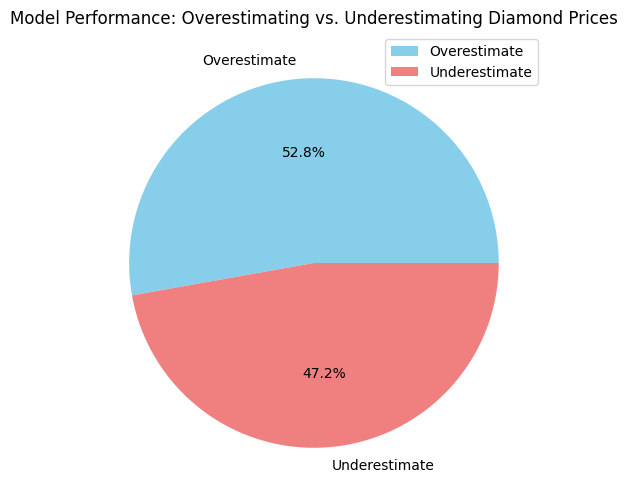

In [48]:
# Creating a pie char showing how many times the model overestimates vs. underestimates the diamond price:
overestimate = sum(residualsInPercent < 0)
underestimate = sum(residualsInPercent > 0)
plt.figure(figsize=(8, 6))
plt.pie([overestimate, underestimate], labels=['Overestimate', 'Underestimate'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Model Performance: Overestimating vs. Underestimating Diamond Prices')
plt.legend()
plt.show()


#### From the pie chart above, we can see that <b>the model <i>slightly</i> tends to overestimate the diamond price more often than it underestimates it (52.8% vs. 47.2%).</b> This means that the model is slightly biased towards overestimating the diamond price, even though the total residual is eventually slightly underestimating as we saw above!

#### <b>However, the difference is very small, and overall we can definitely say that in terms of counting the number of underestimations vs. the number of overestimations, the model is <u>well-balanced</u> in terms of overestimating and underestimating the diamond price!</b>

<font size=5> <b>To further explore underestimating vs. overestimating, I would like to find out whether the overestimation level, "intensity", is greater or less than the underestimation level; <u>in other words, we have already seen that the number of overestimations vs. underestimations is quite well-balanced, but maybe when the model underestimates it underestimates a lot, but when it overestimates it overestimates just by a bit? (or vice versa?).</u></b></font>
To answer this question, I will compute the average residual when the model is overestimating compared to the average residual when the model is underestimating:

In [49]:
# Now, we want to show the average residual when overstimating vs. the average residual when underestimating:
average_residual_overestimate = residuals[residuals < 0].mean()
average_residual_underestimate = residuals[residuals > 0].mean()
print(f"The average residual when overestimating is: ${average_residual_overestimate:.0f}")
print(f"The average residual when underestimating is: ${average_residual_underestimate:.0f}")


The average residual when overestimating is: $-1036
The average residual when underestimating is: $1259


#### <b>We can see that there is no massive difference on the "degree" of overestimating vs. underestimating; when the model is wrong, the error - whether if this is an error of underestimation or overestimation - is quite similar in its value.</b>
<br><br>

---

## <b>Are some features sabotaging the model? How?</b>

<i>To thoroughly explore and find out which features seem to sabotage the model, I will use two methods to explore this question:</i>
- <font size="5.5"><b>Iteratively, I will remove each time a different feature from the dataset, train the model and analyze its performance, compared to the performance of the "original" model (without removing any feature). This way, we can get an accurate and comprehensive view of features that in practice make the model worse - sabotage the model!</b></font><br>
- <font size="5.5"><b>Looking at the <i>SHAP Values</i>, both using <i>beeswarm graph</i> and examining the worst-predicted item, and analyzing what made the model get to that prediction using a <i>waterfall graph</i>.</b></font><br><br>

#### <b>A. Iteratively removing each time a different feature from the dataset, train the model and analyze its performance, compared to the performance of the "original" model (without removing any feature). This way, we can get an accurate and comprehensive view of features that in practice make the model worse - sabotage the model:</b>


In [50]:
# As I wrote above, maybe the best way to find which features may sabotage the model is to run the model each time without one of the features and see how the model performs (compare the results of the model with and without the feature).
# Let's do it for all the features and see which feature has the biggest impact on the model performance:
# We will store the results in a dictionary (the key will be the feature name, and the value will be the R^2 score of the model without the feature):
feature_impact = {}

# We will iterate over each feature and run the model without it, and then compare the results:
for col in X_train.columns:
    X_train_without_feature = X_train.drop(col, axis=1)
    X_test_without_feature = X_test.drop(col, axis=1)
    
    # Training, predicting and evaluating without it!
    xgb_model.fit(X_train_without_feature, y_train)
    prediction_without_feature = xgb_model.predict(X_test_without_feature)
    r2_without_feature = r2_score(y_test, prediction_without_feature)
    feature_impact[col] = r2_without_feature



{'carat_weight': 0.8273288011550903, 'depth_percent': 0.8681347966194153, 'table_percent': 0.8551456928253174, 'meas_length': 0.8013845682144165, 'meas_width': 0.8397521376609802, 'meas_depth': 0.8451087474822998, 'cut_Asscher': 0.855168342590332, 'cut_Cushion': 0.8568688631057739, 'cut_Cushion Modified': 0.8553764224052429, 'cut_Emerald': 0.855233907699585, 'cut_Heart': 0.8563751578330994, 'cut_Marquise': 0.856554388999939, 'cut_Oval': 0.8507053852081299, 'cut_Pear': 0.8565831184387207, 'cut_Princess': 0.8559521436691284, 'cut_Radiant': 0.8599795699119568, 'cut_Round': 0.8608054518699646, 'color_D': 0.8433954119682312, 'color_E': 0.8487904071807861, 'color_F': 0.8501693606376648, 'color_G': 0.8618224263191223, 'color_H': 0.8499657511711121, 'color_I': 0.8616430163383484, 'color_J': 0.8631214499473572, 'color_K': 0.8590995669364929, 'color_L': 0.8544800877571106, 'color_M': 0.8550153374671936, 'color_unknown': 0.8562546968460083, 'clarity_I1': 0.8560306429862976, 'clarity_I2': 0.853175

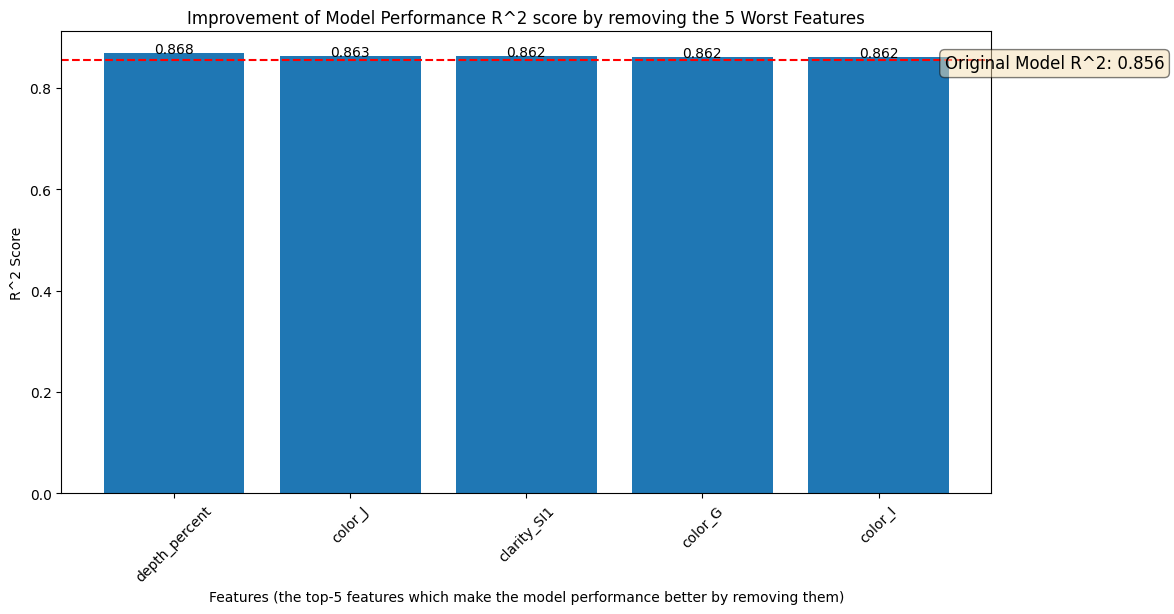

The top-5 features which removing them will make the model performance worse (crucial features) are:
meas_length: 0.801
fancy_color_dominant_color_Red: 0.804
carat_weight: 0.827
meas_width: 0.840
color_D: 0.843


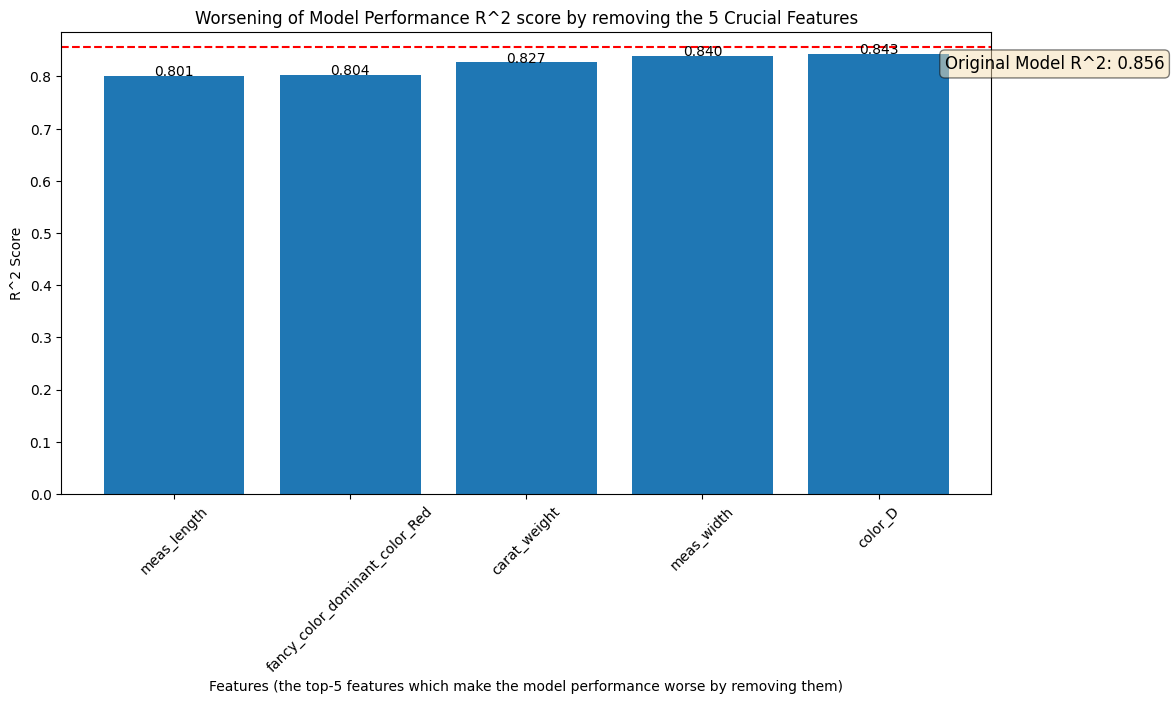

In [51]:
# Now, we will print the dictionary (this will tell us what is the impact of removing each feature on the model performance!)
print(feature_impact)

# Printing the Top-5 features "best", essentia, features:
feature_impact = dict(sorted(feature_impact.items(), key=lambda item: item[1], reverse=True))
print("The top-5 features which removing them will make the model performance better (Sabotaging features) are:")
for i, (key, value) in enumerate(feature_impact.items()):
    if i < 5:
        print(f"{key}: {value:.3f}")

# Showing this top-5 in a graph:
top_5_features = dict(list(feature_impact.items())[:5])
plt.figure(figsize=(12, 6))
plt.bar(top_5_features.keys(), top_5_features.values())
plt.xticks(rotation=45)
plt.xlabel('Features (the top-5 features which make the model performance better by removing them)')
plt.ylabel('R^2 Score')
plt.title('Improvement of Model Performance R^2 score by removing the 5 Worst Features')
# Write the values on top of the bars:
for i, (key, value) in enumerate(top_5_features.items()):
    plt.text(i, value, f"{value:.3f}", ha='center')

# Add to the graph the ORIGINAL R^2 score of the model (if I remember correctly, it was 0.856...):
plt.axhline(y=xgb_r2, color='r', linestyle='--')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.95, 0.95, f'Original Model R^2: {xgb_r2:.3f}', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

plt.show()



# Printing the Top-5 features "worst" features:
feature_impact = dict(sorted(feature_impact.items(), key=lambda item: item[1]))
print("The top-5 features which removing them will make the model performance worse (crucial features) are:")
for i, (key, value) in enumerate(feature_impact.items()):
    if i < 5:
        print(f"{key}: {value:.3f}")
    

# Showing this top-5 in a graph:
top_5_features = dict(list(feature_impact.items())[:5])
plt.figure(figsize=(12, 6))
plt.bar(top_5_features.keys(), top_5_features.values())
plt.xticks(rotation=45)
plt.xlabel('Features (the top-5 features which make the model performance worse by removing them)')
plt.ylabel('R^2 Score')
plt.title('Worsening of Model Performance R^2 score by removing the 5 Crucial Features')
# Write the values on top of the bars:
for i, (key, value) in enumerate(top_5_features.items()):
    plt.text(i, value, f"{value:.3f}", ha='center')

# Add to the graph the ORIGINAL R^2 score of the model (if I remember correctly, it was 0.856...):
plt.axhline(y=xgb_r2, color='r', linestyle='--')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.95, 0.95, f'Original Model R^2: {xgb_r2:.3f}', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

plt.show()

#### As printed above and shown in the graphs, while the original $R^2$ score of the original model without removing any feature is 0.856, when we remove various features, the $R^2$ score gets better or worse.

<b><font size=5.5>In addition, from the 1st bar plot, we can clearly see that there are plenty of features, such as: 'depth_percent' or 'color_J', 'color_G', 'color_I', 'clarity_SI1' (the different columns for color and clarity stem from One-Hot-Encoding of the categorial original 'color' and 'clarity' fields), which removing them improves the model- in other words, they sabotage the model!
<br><br>
For example, while the $R^2$ score of the original model (without removing any feature) is 0.856, <u><b>if we remove the sabotaging feature of 'depth_percent', the $R^2$ score will increase to 0.868. This improves the $R^2$ score by 1.4%!</b></u> Of course that maybe removing multiple "sabotaging features" that were found may improve the model's performance even more, and this should be explored as part of future work (which is not part of this assignment, as we are not asked yet to improve the model's performence).</b></font>

#### <b>It should also be noted that although the question listed on the assignment was what features <u>sabotage</u> the model's performance, from the analysis done above, we can also see which are the <u>crucial, most important</u> features, that removing them results in decrease in the model's performance; <u><i>for example, removing the feature "meas_length" gets $R^2$ score of 0.801, which is 6.43% lower than the original score!</i></u></b> This information will be useful when we will be asked to improve model's performence as part of the next assignment.

---

#### <b>B. Considering the <i>SHAP Values</i>, both using <i>beeswarm graph</i> and examining the worst-predicted item, and analyzing what made the model get to that prediction using a <i>waterfall graph</i>:</b>


#### In order to find out which features are sabotaging the model, we can use the SHAP library, as we did in class. <i><u>It turns out that SHAP values are based on the Shapley value from cooperative game theory (which we learned last year in the course "Game Theory" taught by Prof. David Sarne)</u></i>.

<font size=5><b> Like we learned in Game Theory, where Shapley Values represented the contribution of each player to the total gain of the coalition of all players, I see it quite similar to the Shapley Values in Machine Learning, where we want to understand the contribution of each feature to the prediction of the target variable.</b></font>

As I see it, the "players" (this is how it is defined in Game Theory) in ML are the features, and the "total gain" (this is how it is defined in Game Theory) is the prediction of the target variable!
<br>
<b>Overall, SHAP values are based on the idea that each feature value should be assigned a value that represents the impact of that feature value on the model output, so it will give us indication also regarding features which seem to sabotage the model.</b>


In [52]:
feature_names = xgb_model.feature_names_in_
shap_sample = X_train[feature_names].sample(500)

#### <b>Note that unlike what we did in class: 'shap.Explainer', here since we don't use a simple linear regression model, but XGBoost regressor, we have to use 'shap.<u>Tree</u>Explainer'.</b>

In [53]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer(shap_sample)


<b>Now, I will create a "beeswarm" plot, as we did in class. This is a plot with many data "hidden" inside it, some crucial points that were explained in class when we learned about SHAP values:</b>
- The x-axis represents the <b>SHAP value</b> for a specific feature, and the y-axis represents the <b>feature value</b>.
- Each point represents a <b>single prediction</b> in the dataset, and its position on the x-axis represents the SHAP value for that feature.
- The <b>color of each point</b> represents the feature value (<i>red for high values, blue for low values</i>).


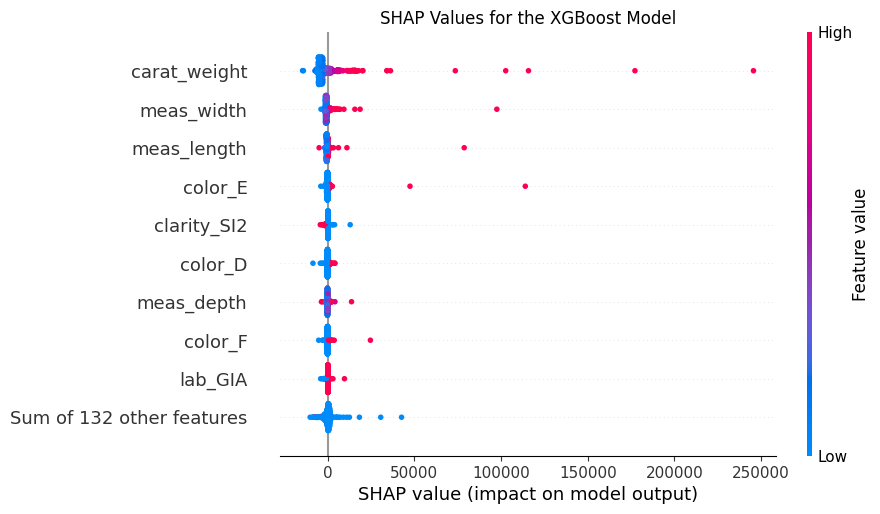

In [54]:
plt.title('SHAP Values for the XGBoost Model')
shap.plots.beeswarm(shap_values)

From reading the beeswarm graph of the shap values, as we learned in class, we can observe that:
- When the carat_weight is high (red color), it makes the model think that the diamond price will be much higher. This is a positive impact on the model.
- When the carat_weight is low (blue color), it makes the model think that the diamond price will be lower (but it doesn't have a big impact on the model as it has when the carat_weight is high).
- Similarly, we can see that when the 'meas_length' or the 'meas_width' are high (red color), it makes the model think that the diamond price will be higher. Same as with the 'meas_depth' feature etc.

This was an overview, a summary of the shap values; but the more practical use for our goal - as we did in class, we can also use shap values to explain the prediction of a <u>single</u> element (it is especially interesting and useful for analyzing important elements, such as the one with the biggest relative error etc.):

In [55]:
X_test_filtered = X_test[feature_names]
test_shap_values = explainer(X_test_filtered)

What was our biggest relative error? Finding it:

In [56]:
# Let's find the the worst prediction, with the biggest relative error, so we can analyze it afterwards:
rel_res=residuals/y_test
rel_res=rel_res.abs()

The real price was:

In [57]:
# Finding the worst prediction:
max_id = rel_res[rel_res==rel_res.max()].index[0]
worst_item_real_price = y_test[max_id]
print("While the real value is:", f"${worst_item_real_price:,.0f}")


While the real value is: $1,014


While our model predicted:

In [58]:
pred_series=pd.Series(prediction,index=rel_res.index)

worst_item_prediction = pred_series[max_id]

print("The worst prediction which our model predicted is:", f"${worst_item_prediction:,.0f}")

The worst prediction which our model predicted is: $18,626


Let's look at this problematic point:

In [59]:
X_test.loc[max_id]


carat_weight                          0.32
depth_percent                         59.4
table_percent                         59.0
meas_length                           4.44
meas_width                            4.48
                                     ...  
fancy_color_intensity_Fancy Light    False
fancy_color_intensity_Fancy Vivid    False
fancy_color_intensity_Light          False
fancy_color_intensity_Very Light     False
fancy_color_intensity_unknown         True
Name: 64132, Length: 142, dtype: object

In [60]:
# Now, I will find the ordinal id of the worst prediction, so I can analyze it afterwards:
max_ordinal_id= X_test.index.get_loc(max_id)

#### <b>Now, this is the desired outcome - we can eventually analyze the worst prediction.</b>
<font size=5><b>I created a <i>waterfall plot</i> for the worst prediction, <b>showing the contribution of each feature to the prediction, and how each feature affects the prediction</b>.</b></font>
<br>
This may help us understand why the model made such a bad prediction - the worst among all predictions...

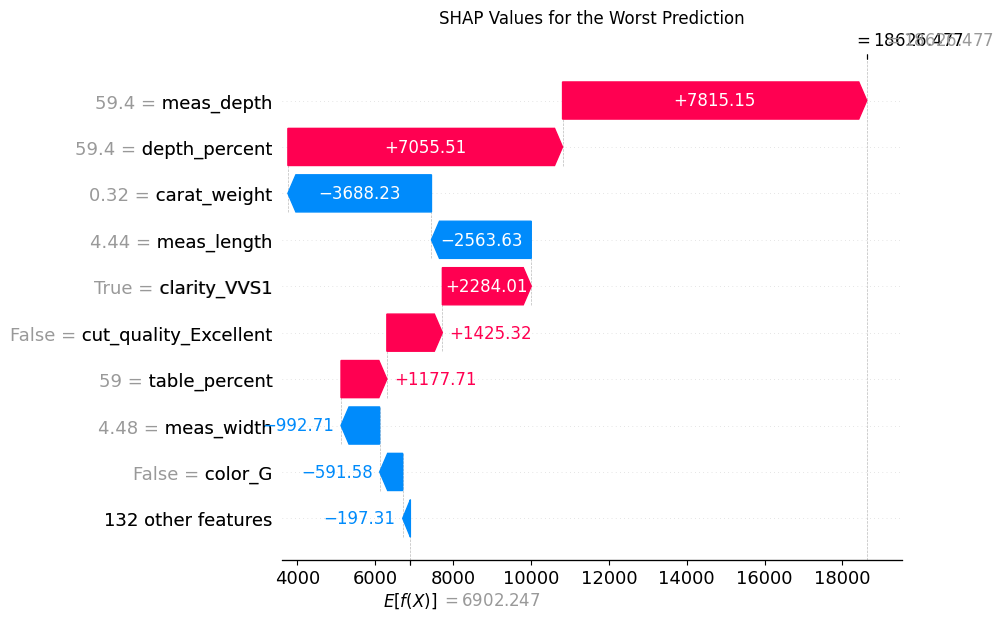

In [61]:
plt.title('SHAP Values for the Worst Prediction')
shap.plots.waterfall(test_shap_values[max_ordinal_id])

In [62]:
shap_values_for_sample = test_shap_values[max_ordinal_id].values.flatten()
shap_values_df = pd.DataFrame(shap_values_for_sample, columns=['SHAP_values'], index=X_test_filtered.columns)
shap_values_abs = shap_values_df['SHAP_values'].abs().sort_values(ascending=False)

# Get the names of the top 2 features with the highest absolute SHAP values:
top_2_features = shap_values_abs.head(2).index.tolist()
print("Top 2 features contributing the most to the prediction:", top_2_features)

Top 2 features contributing the most to the prediction: ['meas_depth', 'depth_percent']


In [63]:
# computing the error percentage for the worst prediction, using worst_item_real_price and worst_item_prediction:
error_percentage = (worst_item_prediction - worst_item_real_price) / worst_item_real_price * 100
print(f"The error percentage for the worst prediction is: {error_percentage:.2f}%")

The error percentage for the worst prediction is: 1736.93%


Recall, as I showed in the cells above, that for this worst prediction (with the biggest relative error), our model predicted a price of: $18,626.479, while the real price is: $1,014. As computed in the cell above, the error percentage for this worst prediction is: 1736.93%. Let's analyze this worst prediction in more detail, using SHAP values.
<br>
<b><u>We should understand why our model gave such a high estimation for this diamond, and what are the features that contributed to this estimation</u></b>.

#### <b><i>We can see that there are mainly <font size=6><u>2 features</u></font> that contributed to the high estimation:</i></b>
- <b><u>meas_depth</u>: adding $7815.15 to the predicted price.
- <u>depth_percent</u>: adding $7055.51 to the predicted price.</b>


#### <b>However, if we look at the correlation matrix which I have presented in the "Data Analysis" section above (the 2nd section in this assignment), we can see that they hardly at all correlate with the target feature (the diamond price).</b>
To make this clear, I will show again the correlation matrix:

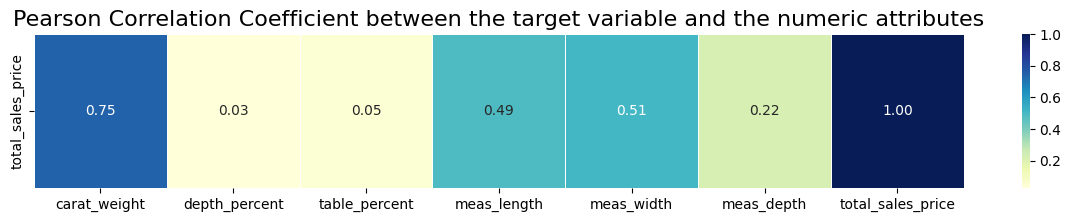

In [64]:
fig, ax = plt.subplots(figsize=(15,2))
# Plotting the correlation matrix as a heatmap:
sns.heatmap(dtf_corr, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5,ax=ax)
plt.title("Pearson Correlation Coefficient between the target variable and the numeric attributes", fontsize=16)
plt.show()

Although there might be a different connection between these features and the target feature, it is strange that the model has increased the predicted diamond price based on such features which are quite weakly-correlated with the target feature:
- <b><u>'meas_depth'</u>: added $7815.15 to the predicted price, <u>but the correlation between it to the target feature is just 0.22</u>.
- <u>'depth_percent'</u>: adding $7055.51 to the predicted price, <u>but the correlation between it to the target feature is just 0.03</u>.</b>

<b>The conculsuon is that there are samples (we have shown here the worst predicted sample) where some of the features are not helping and on the contrary, making the prediction over-priced considerably. This is just one example and cannot serve as a conclusion that these specific features indeed sabotage the overall model. Therefore, an interesting further research would be to find the best set of features that will optimize the performance of the prediction model.
This research is not (yet) part of the scope of this work, but as a preliminary test I have already found which features are counter-productive as a single feature- this is outlined in the previous sub-section. </b>
<br><br>

<b><font size=6><u>What is very interesting to observe is that we are able to reach the conclusion that the 'depth_percent' feature is sabotaging the model by performing 3 different analyses on the data!</u></font>
<br><br>
<font size=5.5>1. We have analyzed the worst-predicted item, and observed that it is heavily overpriced - the error percentage for this worst prediction is: 1736.93%. By analyzing this worst prediction in more detail, using SHAP values, we found out that this feature ('depth_percent') was adding $7055.51 to the predicted price of the worst-predicted item, making the predicted price far from its real price.
<br><br>
2. We observed that while this feature was adding $7055.51 to the predicted price of the worst-predicted item, the correlation between it to the target feature is just 0.03.
<br><br>
3. We observed that while the original $R^2$ score, of the original model (without removing any feature) is 0.856, if we remove the sabotaging feature of 'depth_percent', the $R^2$ score will increase to 0.868. This improves the $R^2$ score by 1.4%.</font></b>

---

## <b>Are you able to find commonalities between the erroneous samples?</b>

I have already presented that cheaper diamonds have higher residual in percentage terms:

In [65]:
residuals = y_test - prediction
residualsInPercent = residuals / y_test * 100

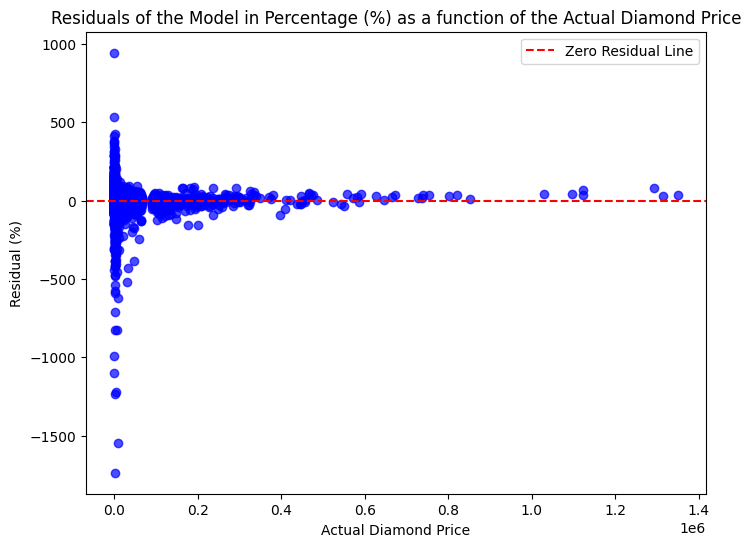

In [31]:
# Visualize residuals as a percentage, x-axis is the actual diamond price
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residualsInPercent, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residuals of the Model in Percentage (%) as a function of the Actual Diamond Price')
plt.xlabel('Actual Diamond Price')
plt.ylabel('Residual (%)')
plt.legend()
plt.show()

<b><font size=5.5>Now, we can also analyze additional attributes aside from the diamond price and show that specific values of these attributes have higher residual error percentage. In other words, we can find commonalities between erroneous samples (which have higher residuals) which are related to specific attributes of these erroneous samples! </font></b>

The following graph shows the residual error in percentage as a function of the "Depth percent" attribute of the diamond, and as can be easily observed the common value of approximately 60 is contibuting a significant residual error relative to other values of "Depth percent". 

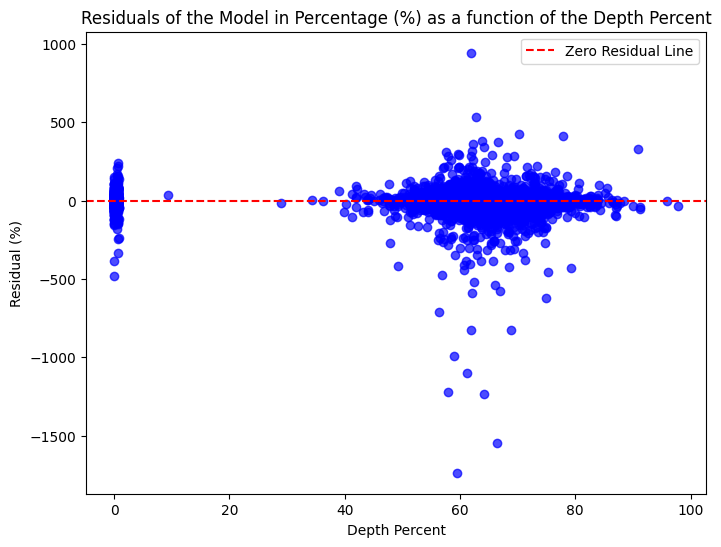

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test['depth_percent'], residualsInPercent, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residuals of the Model in Percentage (%) as a function of the Depth Percent')
plt.xlabel('Depth Percent')
plt.ylabel('Residual (%)')
plt.legend()
plt.show()


The following graph shows the residual error in percentage as a function of the 'meas_width' attribute of the diamond, and as can be easily observed the common value of approximately 5 (the lowest value aside from 0) is contibuting a significant residual error relative to other values of "Meas Width". 

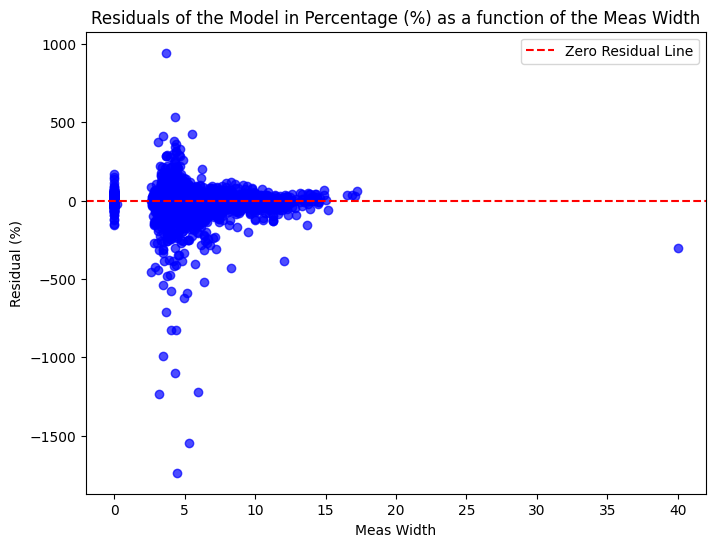

In [33]:
# Visualize residuals
residuals = y_test - prediction
residualsInPercent = residuals / y_test * 100
plt.figure(figsize=(8, 6))
plt.scatter(X_test['meas_width'], residualsInPercent, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residuals of the Model in Percentage (%) as a function of the Meas Width')
plt.xlabel('Meas Width')
plt.ylabel('Residual (%)')
plt.legend()
plt.show()

The following graph shows the residual error in percentage as a function of the "Color" attribute of the diamond (we unified the One-Hot-Encoded columns, such as color_I, color_J etc. to a single attribute and divided the x-axis according to the diamond's color), and as can be easily observed that when diamonds have color value classified as "unknown" (this not isNa() values, but an unknown attribute, as explain in section 2.5 about data cleaning and preprocessing regarding future work), it contibutes a significant residual error relative to other values of "color". 

['color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'color_K', 'color_L', 'color_M', 'color_unknown']


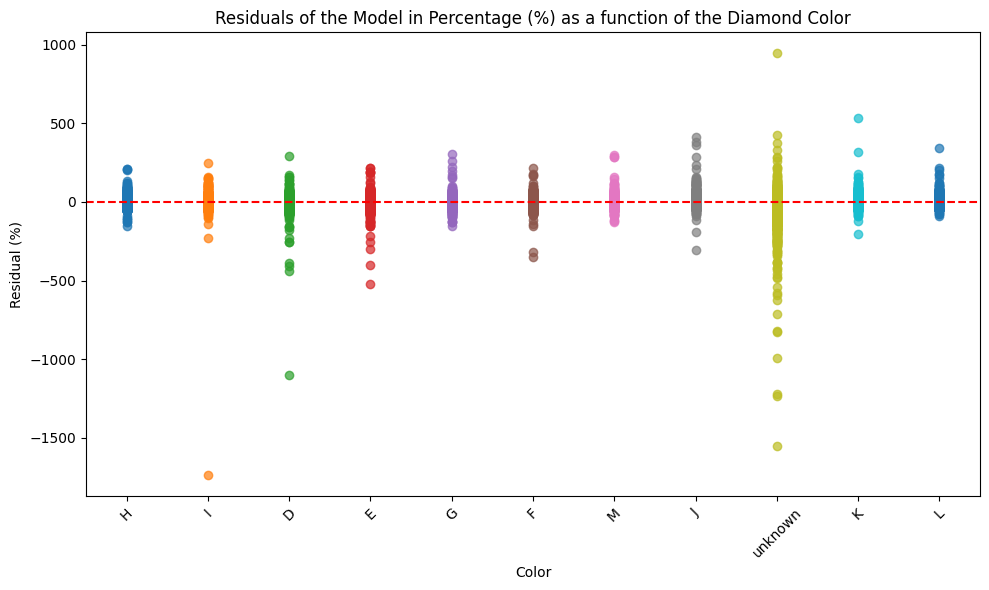

In [34]:
# Finding out which columns in X_test start with the string "color" and printing them:
color_cols = [col for col in X_test.columns if col.startswith('color')]
print(color_cols)


plt.figure(figsize=(10, 6))

# Convert boolean to color names for each sample
sample_colors = []
for idx in X_test.index:
    color_name = 'Unknown'
    for col in color_cols:
        if X_test.loc[idx, col]:
            color_name = col.replace('color_', '')
            break
    sample_colors.append(color_name)

# Create scatter plot
for color in set(sample_colors):
    mask = [c == color for c in sample_colors]
    plt.scatter(
        [color] * sum(mask),
        residualsInPercent[mask],
        alpha=0.7,
        label=color
    )

plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residuals of the Model in Percentage (%) as a function of the Diamond Color')
plt.xlabel('Color')
plt.ylabel('Residual (%)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The following graph shows the residual error in percentage as a function of the "culet_condition" attribute of the diamond (again, unified from One-Hot-Encoded columns), and similar to the previous attribute it can be easily observed that an "unknown" attribute contibutes a significant residual error relative to other values of "culet_condition". In this example, aside from the "unknown" case, the value of "Pointed" is also contributing a significant residual error relative to other value of "culet_condition".

['culet_condition_Abraded', 'culet_condition_Chipped', 'culet_condition_Pointed', 'culet_condition_unknown']


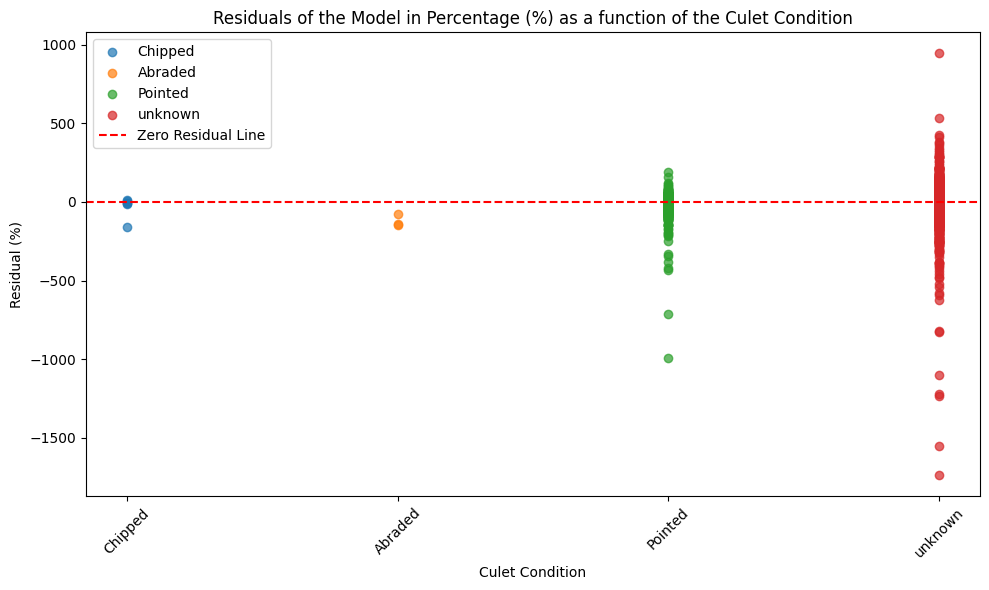

In [36]:
# Finding out which columns in X_test start with the string "culet_condition" and printing them:
culet_condition_cols = [col for col in X_test.columns if col.startswith('culet_condition')]
print(culet_condition_cols)

plt.figure(figsize=(10, 6))

# Convert boolean to culet_condition names for each sample
sample_culet_conditions = []
for idx in X_test.index:
    culet_condition_name = 'Unknown'
    for col in culet_condition_cols:
        if X_test.loc[idx, col]:
            culet_condition_name = col.replace('culet_condition_', '')
            break
    sample_culet_conditions.append(culet_condition_name)

# Create scatter plot
for culet_condition in set(sample_culet_conditions):
    mask = [c == culet_condition for c in sample_culet_conditions]
    plt.scatter(
        [culet_condition] * sum(mask),
        residualsInPercent[mask],
        alpha=0.7,
        label=culet_condition
    )

plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residuals of the Model in Percentage (%) as a function of the Culet Condition')
plt.xlabel('Culet Condition')
plt.ylabel('Residual (%)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend()
plt.show()
